# Машинное обучение в задачах кредитного скоринга 

Целью данной работы является построение модели машинного обучения, которая может предсказывать кредитный рейтинг клиента на основе его кредитной истории и финансовой активности. Данная задача является задачей многоклассовой классификации.

В данной работе используется набор данных, содержащий информацию о кредитной истории клиентов. Датасет включает в себя такие признаки, как демографические данные клиентов (возраст, профессия, доход), информация о их кредитных продуктах (количество кредитов, типы кредитов, процентные ставки), история платежей (просрочки, количество просроченных платежей), а также показатели финансовой активности (инвестиции, среднемесячный баланс). Целевая переменная – Credit_Score – отражает кредитный рейтинг клиента и принимает три значения: "Poor", "Standard", "Good". 
## Описание признаков:
- ID: Уникальный идентификатор записи.
- Customer_ID: Уникальный идентификатор клиента.
- Month: Месяц, к которому относится запись.
- Name: Имя клиента.
- Age: Возраст клиента.
- SSN: Номер социального страхования клиента (SSN).
- Occupation: Профессия клиента.
- Annual_Income: Годовой доход клиента.
- Monthly_Inhand_Salary: Ежемесячный доход клиента после вычета налогов.
- Num_Bank_Accounts: Количество банковских счетов клиента.
- Num_Credit_Card: Количество кредитных карт клиента.
- Interest_Rate: Средняя процентная ставка по кредитным картам клиента.
- Num_of_Loan: Количество кредитов клиента.
- Type_of_Loan: Типы кредитов клиента (может быть несколько, разделенных запятыми).
- Delay_from_due_date: Среднее количество дней просрочки платежей по кредитам клиента.
- Num_of_Delayed_Payment: Количество просроченных платежей клиента.
- Changed_Credit_Limit: Процент изменения кредитного лимита клиента.
- Num_Credit_Inquiries: Количество кредитных запросов, сделанных клиентом.
- Credit_Mix: Качество кредитного портфеля клиента (Bad, Standard, Good).
- Outstanding_Debt: Сумма непогашенной задолженности клиента.
- Credit_Utilization_Ratio: Коэффициент использования кредита клиентом (отношение использованного кредита к доступному).
- Credit_History_Age: Возраст кредитной истории клиента в месяцах.
- Payment_of_Min_Amount: Информация о том, оплачивает ли клиент минимальную сумму по кредитам (Yes, No, NM).
- Total_EMI_per_month: Общая сумма ежемесячных платежей клиента по кредитам.
- Amount_invested_monthly: Сумма ежемесячных инвестиций клиента.
- Payment_Behaviour: Характеристика платежного поведения клиента (например, "Low_spent_Small_value_payments").
- Monthly_Balance: Среднемесячный остаток на счетах клиента.
- Credit_Score: Целевая переменная, отражающая кредитный рейтинг клиента (Poor, Standard, Good).

# Работа с данными

# 01. Загрузка необходимых библиотек 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import os
import re
import time
import random
import tempfile
from tqdm.auto import tqdm

import gc
gc.collect()

0

In [2]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
sns.set_style("whitegrid", {'axes.grid' : False})
import warnings
warnings.filterwarnings("ignore") 

# 02. Загрузка очищенного датасета

In [3]:

df_train = pd.read_csv(r"C:\KR\train.csv")
df_test  = pd.read_csv(r"C:\KR\test.csv")

df_train.shape, df_test.shape # Вывод размерности обучающей и тестовой выборок

((100000, 28), (50000, 27))

In [4]:
df_train.head().T

,0,1,2,3,4
ID,5634,5635,5636,5637,5638
Customer_ID,3392,3392,3392,3392,3392
Month,1,2,3,4,5
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23.000,23.000,23.000,23.000,23.000
SSN,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.120,19114.120,19114.120,19114.120,19114.120
Monthly_Inhand_Salary,1824.843,1824.843,1824.843,1824.843,1824.843
Num_Bank_Accounts,3.000,3.000,3.000,3.000,3.000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay_

### Выводы из первичного анализа данных:

* Обучающая выборка содержит 100000 строк и 28 столбцов.
* Тестовая выборка содержит 50000 строк и 27 столбцов (отсутствует целевая переменная).
* В обучающей выборке присутствуют 3 типа данных: float64(18), int64(3), object(7).
* Пропущенные значения отсутствуют.
* В тестовой выборке присутствуют 3 типа данных: float64(18), int64(3), object(6).
* Пропущенные значения отсутствуют.

In [7]:
# Удаление столбцов, которые не будут использоваться для обучения модели
df_train.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)
df_test.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.000,33.316,10.765,14.000,24.000,33.000,42.000,56.000
Annual_Income,100000.000,50505.123,38299.422,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,100000.000,4197.271,3186.432,303.645,1626.594,3095.905,5957.715,15204.633
Num_Bank_Accounts,100000.000,5.369,2.593,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,100000.000,5.534,2.067,0.000,4.000,5.000,7.000,11.000
Interest_Rate,100000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,100000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,100000.000,21.081,14.805,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,100000.000,13.313,6.237,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,100000.000,10.470,6.609,0.500,5.380,9.400,14.850,29.980


* Наибольший разброс значений (стандартное отклонение) наблюдается в признаках Annual_Income, Monthly_Inhand_Salary, Total_EMI_per_month.
* Медианные значения большинства признаков (кроме  Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Num_Credit_Inquiries, Credit_History_Age, Total_EMI_per_month, Amount_invested_monthly)  близки к среднему, что может указывать на нормальное распределение.


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.000,33.804,10.765,14.000,25.000,33.000,42.000,56.000
Annual_Income,50000.000,50505.123,38299.614,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,50000.000,4183.034,3175.319,303.645,1623.555,3082.272,5937.530,15204.633
Num_Bank_Accounts,50000.000,5.369,2.595,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,50000.000,5.534,2.072,0.000,4.000,5.000,7.000,11.000
Interest_Rate,50000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,50000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,50000.000,21.067,14.806,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,50000.000,13.315,6.238,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,50000.000,10.465,6.606,0.500,5.380,9.410,14.810,29.980


* Наибольший разброс значений (стандартное отклонение) наблюдается в признаках Annual_Income, Monthly_Inhand_Salary, Total_EMI_per_month.
* Медианные значения большинства признаков (кроме  Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Num_Credit_Inquiries, Credit_History_Age, Total_EMI_per_month, Amount_invested_monthly)  близки к среднему, что может указывать на нормальное распределение.

In [10]:
df_train.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28580
Credit_Score,100000,3,Standard,53174


* Наиболее часто встречающиеся значения в обучающей выборке:
    - Occupation: Lawyer
    - Type_of_Loan: No Data
    - Credit_Mix: Standard
    - Payment_of_Min_Amount: Yes
    - Payment_Behaviour: Low_spent_Small_value_payments
    - Credit_Score: Standard

In [11]:
df_test.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,50000,15,Lawyer,3548
Type_of_Loan,50000,6261,No Data,5704
Credit_Mix,50000,3,Standard,22924
Payment_of_Min_Amount,50000,3,Yes,26158
Payment_Behaviour,50000,6,Low_spent_Small_value_payments,14151


* Наиболее часто встречающиеся значения в тестовой выборке:
    - Occupation: Lawyer
    - Type_of_Loan: No Data
    - Credit_Mix: Standard
    - Payment_of_Min_Amount: Yes
    - Payment_Behaviour: Low_spent_Small_value_payments

<Axes: >

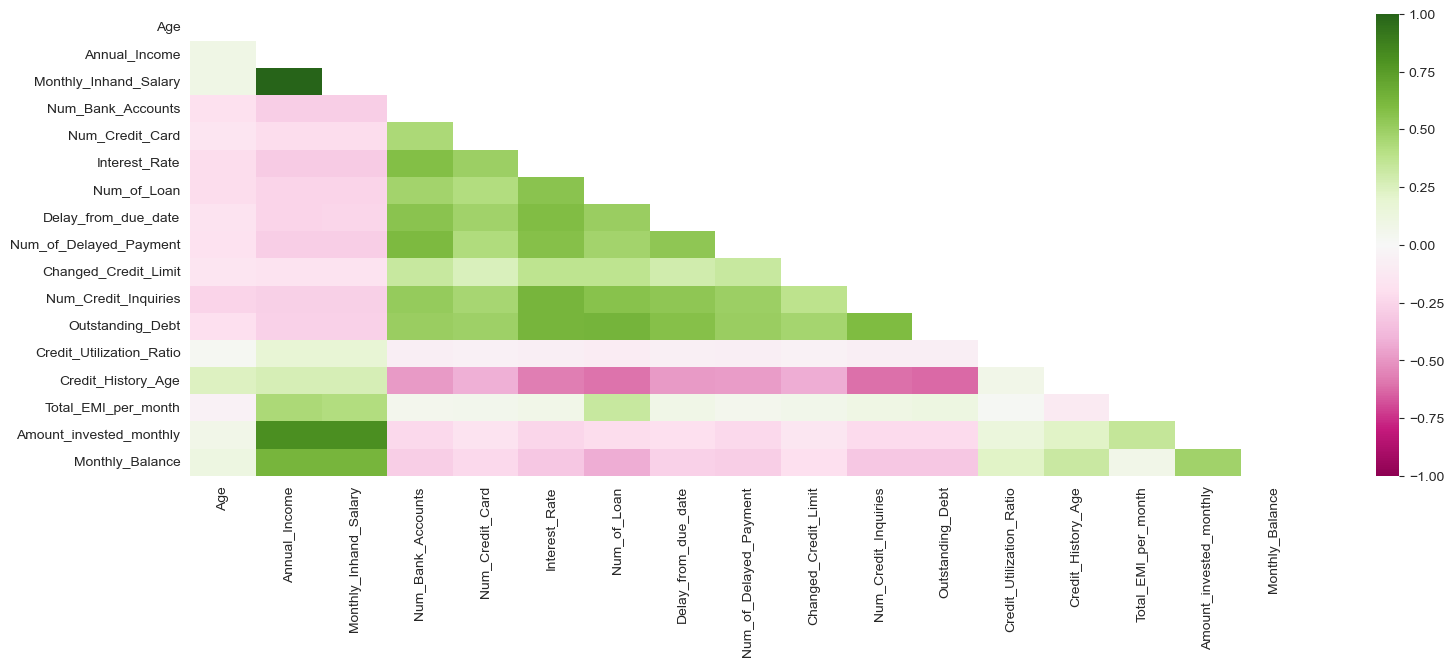

In [12]:
# Анализ взаимосвязи между числовыми признаками
plt.figure(figsize=(18, 6))
sns.heatmap(
    df_train.corr(numeric_only=True), 
    mask=np.triu(np.ones_like(df_train.corr(numeric_only=True), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG", fmt=".2f",
    annot_kws={"weight": "bold", "size": 10}
)

визуальный анализ взаимосвязи между признаками говорит нам о том, что почти все данные сильно коррелируют между собой, например сильная  положительная  корреляция  между  годовым  доходом  ```"Annual_Income```  и  ежемесячным  доходом ```"Monthly_Inhand_Salary```,  что  ожидаемо

# 03.  Предобработка данных для многоклассовой классификации
### Предобработка данных:

* **Разделение данных:** Данные будут разделены на обучающую и тестовую выборки с использованием `train_test_split`. 
* **Кодирование категориальных признаков:** Для  преобразования  категориальных  признаков  в  числовые  будут  использованы  `OneHotEncoder`  и  `OrdinalEncoder`.  Выбор  метода  кодирования  будет  зависеть  от  природы  признака  и  его  значимости  для  модели.
* **Масштабирование данных:**   В  случае  необходимости  будет  использован  `MinMaxScaler`,  `StandardScaler`  или  `RobustScaler`  в  зависимости  от  распределения  данных  и  характеристик  выбранных  моделей.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, fbeta_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV

import pickle
import joblib
SEED = 101

## Разделение на обучающую и тестовую выборки

In [14]:
df_train["Credit_Score"].value_counts(normalize=True).sort_index()

Credit_Score
Good       0.178
Poor       0.290
Standard   0.532
Name: proportion, dtype: float64

In [15]:
X      = df_train.drop(columns="Credit_Score")
y      = df_train['Credit_Score']
X_test = df_test

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, 

#Данные разделяются на обучающую и проверочную выборки, чтобы оценить производительность модели на невидимых данных. Параметр stratify гарантирует,
#что распределение классов в обучающей и проверочной выборках будет таким же, как в исходных данных.


((80000, 22), (80000,), (20000, 22), (20000,), (50000, 22))

### Разделение данных:

* **Соотношение выборок:**  Данные разделены на обучающую (80%) и тестовую (20%) выборки. 
* **Метод разделения:**  Использован стратифицированный метод разделения (`stratify=y`) для  сохранения  распределения  классов  в  обучающей  и  тестовой  выборках.
* **Фиксация случайности:**  Генератор  случайных  чисел  зафиксирован  (`random_state=SEED`)  для  воспроизводимости  результатов.

## Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder

le          = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val   = le.transform(y_val)

label_map = {k:v for k,v in zip(np.unique(y_train), le.classes_)}
label_map

#присваиваем уникальные значения для каждого параметра целевой переменной


{0: 'Good', 1: 'Poor', 2: 'Standard'}

In [17]:
import joblib
joblib.dump(le, r'c:/KR/label_encoder.joblib')
#сохраняем это присваивание для пользовательской модели


['c:/KR/label_encoder.joblib']

## Кодирование с помощью json_normalize

- Type_of_Loan может содержать несколько значений, разделенных запятыми. Функция ```json_normalizer``` создаёт отдельный признак для каждого типа кредита, где значение 1 указывает на наличие данного типа кредита у заёмщика, а 0 – на его отсутствие.

In [18]:
def json_normalizer(df, col, train_data, sep=',', pre='ToL_'):
    df = df[col].apply(lambda x: {k:1 for k in x.split(sep) if k in train_data})
    df = pd.json_normalize(df).fillna(0).astype(int).add_prefix(pre)
    return df

# Преобразование категориальных признаков с несколькими значениями в бинарные признаки, увеличивая размерность данных.
- файл ```get_dummies.py``` находится в этом же репозитории

In [19]:
[col for col in X_train.select_dtypes('O').columns if X_train[col].str.contains(',', regex=True).any()]

['Type_of_Loan']

In [20]:
import os #добавляем директорию с get_dummies.py в PATH, для корректного импорта библиотеки (не требуется для MACOS)
import sys
module_path = "C:\\KR"
if module_path not in sys.path:
    sys.path.append(module_path)

In [21]:
from get_dummies import GetDummies #получаем "Дамми" значения
dummy = GetDummies()
X_train_dummy = dummy.fit_transform(X_train)
X_val_dummy   = dummy.transform(X_val)
X_train_dummy.shape, X_val_dummy.shape

((80000, 31), (20000, 31))

In [22]:
X_val_dummy.iloc[:, -11::].head(3)

,Monthly_Balance,ToL_No Data,ToL_auto loan,ToL_credit-builder loan,ToL_debt consolidation loan,ToL_home equity loan,ToL_mortgage loan,ToL_not specified,ToL_payday loan,ToL_personal loan,ToL_student loan
44513,324.783,0,0,0,0,0,0,1,0,0,0
15073,316.347,0,1,0,0,0,0,0,1,1,0
44874,416.292,0,0,0,0,1,0,0,0,0,0


### OneHotEncoder

Для  преобразования  оставшихся  категориальных  признаков  ("Occupation",  "Credit_Mix",  "Payment_of_Min_Amount",  "Payment_Behaviour")  в  числовой  формат,  мы  используем  OneHotEncoder.  Этот  метод  также  создает  бинарные  признаки  для  каждого  уникального  значения  в  категориальных  столбцах.  

**Параметры  OneHotEncoder:**

* `handle_unknown="ignore"`:  Игнорировать  неизвестные  значения  в  тестовой  выборке.
* `sparse=False`:  Создавать  плотные  матрицы  вместо  разреженных.



In [23]:
from sklearn.preprocessing import OneHotEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.tolist()   
print('OneHotEncoder:', cat)
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index, 
    columns = ohe.get_feature_names_out(cat)
)    
X_val_cat  = pd.DataFrame(
    ohe.transform(X_val_dummy[cat]), index = X_val_dummy.index, 
    columns = ohe.get_feature_names_out(cat)
)    
X_train_ohe = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_ohe   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_ohe.shape, X_val_ohe.shape

OneHotEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


((80000, 54), (20000, 54))

In [24]:
print(X_train_ohe.columns.tolist())

['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes', 'Payment_Behaviour_High_spent_Large_value_payments', 'Payment_Behaviour_High_spent_Medium_value_payments', 'Payment_Behaviour_High_spent_Small_value_payments', 'Payment_Behaviour_Low_spent_Large_value_payments', 'Payment_Behaviour_Low_spent_Medium_value_payments', 'Payment_Behaviour_Low_spent_Small_value_payments', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credi

## Масштабирование данных
-```MinMaxScaler``` приводит все числовые признаки к диапазону от ```0``` до ```1```. Это важно для алгоритмов, чувствительных к масштабу признаков, таких как логистическая регрессия.

In [25]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_ohe), columns=X_train_ohe.columns)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val_ohe), columns=X_val_ohe.columns)

### OrdinalEncoder

В  данном  наборе  данных  некоторые  категориальные  признаки  имеют  естественный  порядок  ("Credit_Mix"  и  "Payment_of_Min_Amount").  Для  таких  признаков  подходит  кодирование  с  помощью  OrdinalEncoder,  который  присваивает  числовые  метки  в  соответствии  с  порядком  категорий.

**Пример:**

* Для  "Credit_Mix":  "Bad"  может  быть  закодирован  как  0,  "Standard"  -  как  1,  а  "Good"  -  как  2.
* Для  "Payment_of_Min_Amount":  "No"  -  0,  "NM"  -  1,  "Yes"  -  2.

**Параметры  OrdinalEncoder:**

* `handle_unknown='use_encoded_value'`:  Для  неизвестных  значений  в  тестовой  выборке  будет  использовано  последнее  закодированное  значение.
* `unknown_value=-1`:  Если  неизвестное  значение  встретится  в  тестовой  выборке,  ему  будет  присвоена  метка  -1.

**Обоснование  применения  OrdinalEncoder:**

* OrdinalEncoder  учитывает  порядок  категорий  в  признаках  "Credit_Mix"  и  "Payment_of_Min_Amount",  что  может  повысить  точность  моделей.

In [26]:
import sklearn

In [27]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.to_list()    
print('OrdinalEncoder:', cat) 
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index, 
    columns = enc.feature_names_in_
)    
X_val_cat  = pd.DataFrame(
    enc.transform(X_val_dummy[cat]), index = X_val_dummy.index, 
    columns = enc.feature_names_in_
)    
X_train_enc = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_enc   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_enc.shape, X_val_enc.shape
import joblib #сохранение для пользовательской модели
joblib.dump(enc, r'c:/KR/encoder.joblib') 
feature_order = X_train_enc.columns

OrdinalEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [28]:
print(X_train_enc.columns.tolist())

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'ToL_No Data', 'ToL_auto loan', 'ToL_credit-builder loan', 'ToL_debt consolidation loan', 'ToL_home equity loan', 'ToL_mortgage loan', 'ToL_not specified', 'ToL_payday loan', 'ToL_personal loan', 'ToL_student loan']


## Определение функций для оценки моделей

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import make_scorer

# для multi-class
scoring = {
    'precision': make_scorer(precision_score, average=None, labels=[1]),
    'recall'   : make_scorer(recall_score, average=None, labels=[1]),
    'f1'       : make_scorer(f1_score, average=None, labels=[1]),
    'accuracy' : make_scorer(accuracy_score),
} 
# идентефикация людей с низким кредитным рейтингом
scoring['recall'] 
log_loss_neg = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report 

def eval(model, X_train, X_val, y_train=y_train, y_val=y_val, isProba=False):
    print('TEST')    
    y_val_pred = np.argmax(model.predict(X_val), axis=1) if isProba else model.predict(X_val)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    print("-------------------------------------------------------")
    print('TRAIN')
    y_train_pred = np.argmax(model.predict(X_train), axis=1) if isProba else model.predict(X_train)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    #Функция выводит матрицу ошибок и отчёт о классификации для обучающей и проверочной выборок, что позволяет оценить качество модели и наличие переобучения.

### Метрики  и  функция  для  оценки  моделей

Для  оценки  производительности  моделей  классификации  будут  использоваться  следующие  метрики:

* **Precision (точность):**  Доля  правильно  классифицированных  объектов  среди  всех  объектов,  предсказанных  как  принадлежащие  к  данному  классу. 
* **Recall (полнота):**  Доля  правильно  классифицированных  объектов  среди  всех  объектов,  действительно  принадлежащих  к  данному  классу.
* **F1-score:**  Среднее  гармоническое  precision  и  recall. 
* **Accuracy (точность):** Доля  правильно  классифицированных  объектов  среди  всех  объектов. 
* **ROC  AUC:**  Площадь  под  ROC-кривой. 

**Функция  `eval`:**

Функция  `eval`  принимает  на  вход  обученную  /модель,  обучающую  и  проверочную  выборки,  и  выводит:

* Матрицу  ошибок  для  проверочной  выборки.
* Отчет  о  классификации  для  проверочной  выборки.
* Матрицу  ошибок  для  обучающей  выборки.
* Отчет  о  классификации  для  обучающей  выборки.

Эта  функция  позволяет  удобно  оценивать  производительность  модели  и  анализировать  ее  ошибки  на  обучающей  и  проверочной  выборках.

### Проверка весов классов
 - Так как классы в данных неравномерно распределены, используются веса классов, чтобы алгоритм обучения уделял больше внимания меньшим классам.

In [31]:
from sklearn.utils import class_weight
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.unique(sample_weight)

array([1.14947483, 1.86977049, 0.62687573])

In [32]:
from sklearn.utils import class_weight

class_weights = dict(zip(
    np.unique(y_train), 
    class_weight.compute_class_weight(
        class_weight='balanced', 
        classes=np.unique(y_train), 
        y=y_train
    )
))
class_weights

{0: 1.8697704856728836, 1: 1.14947483368536, 2: 0.6268757297225291}

In [33]:
from collections import Counter

counter = Counter(y_train)
class_weights = {k: max(counter.values())/v  for k,v in counter.items()}
class_weights

{1: 1.8336566231303073, 0: 2.982681250876455, 2: 1.0}

In [34]:
# Вычисление весов
class_weights = (pd.value_counts(y_train).max() / pd.value_counts(y_train)).to_dict()
class_weights 

{2: 1.0, 1: 1.8336566231303073, 0: 2.982681250876455}

# 01. Реализация модели логистической регрессии
### Модель  логистической  регрессии

Логистическая  регрессия  -  это  линейный  алгоритм  классификации,  который  используется  для  прогнозирования  вероятности  принадлежности  объекта  к  определенному  классу. 

**Параметры  модели:**

* `class_weight="balanced"`:  Использование  весов  классов  для  учета  дисбаланса.
* `random_state=SEED`:  Фиксация  генератора  случайных  чисел  для  воспроизводимости  результатов.
* `max_iter=10000`:  Максимальное  число  итераций  для  сходимости  алгоритма. 

In [50]:
lr = LogisticRegression(
    class_weight = "balanced",
    random_state = SEED,
    max_iter     = 10000
)

In [51]:
%%time
#Обучение модели логистической регрессии на масштабированных данных с измерением времени обучения.
lr.fit(X_train_scaled, y_train)

CPU times: total: 23.6 s
Wall time: 6.42 s


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101)

In [46]:
print("LOG MODEL")
eval(lr, X_train_scaled, X_val_scaled)
#Анализ качества модели и проверка наличия переобучения.

LOG MODEL
TEST
[[2968   95  503]
 [ 927 3939  933]
 [2104 2255 6276]]
              precision    recall  f1-score   support

           0       0.49      0.83      0.62      3566
           1       0.63      0.68      0.65      5799
           2       0.81      0.59      0.68     10635

    accuracy                           0.66     20000
   macro avg       0.64      0.70      0.65     20000
weighted avg       0.70      0.66      0.66     20000

-------------------------------------------------------
TRAIN
[[11940   379  1943]
 [ 3656 15908  3635]
 [ 8438  8531 25570]]
              precision    recall  f1-score   support

           0       0.50      0.84      0.62     14262
           1       0.64      0.69      0.66     23199
           2       0.82      0.60      0.69     42539

    accuracy                           0.67     80000
   macro avg       0.65      0.71      0.66     80000
weighted avg       0.71      0.67      0.67     80000



**Выводы:**

* Модель логистической регрессии демонстрирует  **умеренную  производительность**  на  проверочной  выборке  с  точностью  **66%**.
* Наблюдается  небольшое  различие  в  точности  между  обучающей  и  проверочной  выборками (67%  и  66%  соответственно),  что  указывает  на  **отсутствие  значительного  переобучения**.
* Модель  **лучше  всего  предсказывает  класс  "Good" (0)**  (полнота  83%  на  тестовой  выборке),  в  то  время  как  для  класса  **"Standard" (2)**  полнота  составляет  всего  59%.  
* Это  может  быть  связано  с  **дисбалансом  классов**  в  данных.

## С наилучшими параметрами (GridsearchCV)
- поиск наилучших гиперпараметров и обучение модели с этими параметрами

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = LogisticRegression(
    random_state = SEED,
    max_iter     = 99999
)
param_grid = {
    "penalty"     : ["l2"],
    "C"           : np.linspace(0.001, 1, 3).round(3),
    "class_weight": ["balanced"],
    "solver"      : ["lbfgs", "liblinear", "sag", "saga"]
}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
grid_model_log = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring = make_scorer(fbeta_score, average=None, labels=[1], beta=0.8, zero_division=0),
    error_score="raise",
    refit=True,
    verbose=1,
    n_jobs=-1,
    cv=kf,
) 


In [48]:
%%time
grid_model_log.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 3.84 s
Wall time: 44.1 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise',
             estimator=LogisticRegression(max_iter=99999, random_state=101),
             n_jobs=-1,
             param_grid={'C': array([0.001, 0.5  , 1.   ]),
                         'class_weight': ['balanced'], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring=make_scorer(fbeta_score, average=None, labels=[1], beta=0.8, zero_division=0),
             verbose=1)

In [49]:

grid_model_log.best_score_, grid_model_log.best_params_

(0.6569627924120433,
 {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'})

In [50]:
print("GRID LOG MODEL BALANCED")
eval(grid_model_log, X_train_scaled, X_val_scaled)

GRID LOG MODEL BALANCED
TEST
[[2969   93  504]
 [ 930 3937  932]
 [2107 2251 6277]]
              precision    recall  f1-score   support

           0       0.49      0.83      0.62      3566
           1       0.63      0.68      0.65      5799
           2       0.81      0.59      0.68     10635

    accuracy                           0.66     20000
   macro avg       0.64      0.70      0.65     20000
weighted avg       0.70      0.66      0.66     20000

-------------------------------------------------------
TRAIN
[[11931   380  1951]
 [ 3661 15906  3632]
 [ 8438  8527 25574]]
              precision    recall  f1-score   support

           0       0.50      0.84      0.62     14262
           1       0.64      0.69      0.66     23199
           2       0.82      0.60      0.69     42539

    accuracy                           0.67     80000
   macro avg       0.65      0.71      0.66     80000
weighted avg       0.71      0.67      0.67     80000



Изменение гиперпараметров модели при помощи Grid Search никак не повлияла на точность предсказания модели.

# 02. Реализация ```RandomForest```, ```KNN```, ```SVM```, ``` DecisionTree``` и ```Gaussian Naive Bayes``` моделей

## RandomForestClassifier
### Модель  случайного  леса (RandomForest)

RandomForest  -  это  ансамблевый  алгоритм,  который  строит  множество  деревьев  решений  и  объединяет  их  предсказания  для  получения  более  точного  и  стабильного  результата.

**Параметры  модели:**

* `class_weight='balanced'`:  Использование  весов  классов  для  учета  дисбаланса.
* `random_state=SEED`:  Фиксация  генератора  случайных  чисел  для  воспроизводимости  результатов. 

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight = 'balanced',
    random_state = SEED
)

In [66]:
%%time
rf.fit(X_train_enc, y_train)

CPU times: total: 15.7 s
Wall time: 19 s


RandomForestClassifier(class_weight='balanced', random_state=101)

In [ ]:
print("RF MODEL")
eval(rf, X_train_enc, X_val_enc)

RF MODEL
TEST
[[2751   10  805]
 [   8 4905  886]
 [ 755 1264 8616]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      3566
           1       0.79      0.85      0.82      5799
           2       0.84      0.81      0.82     10635

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000

-------------------------------------------------------
TRAIN
[[14261     0     1]
 [    0 23199     0]
 [    1     0 42538]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14262
           1       1.00      1.00      1.00     23199
           2       1.00      1.00      1.00     42539

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



на тестовой выборке модель делает верные предсказания с 81% шансом, но судя по ```accuracy``` на тренировочной выборке, модель переобучена

## RandomForest С лучшими параметрами (hyperopt)
- hyperopt позволяет автоматизировать поиск наилучших гиперпараметров модели. В space определяются диапазоны значений для каждого гиперпараметра. Целевая функция ```objective``` обучает модель с текущими гиперпараметрами, оценивает её производительность на проверочной выборке (используя F-меру с бета=0.5 и фокусом на класс ```"Poor"```) и возвращает значение метрики.


In [ ]:
from hyperopt.pyll import scope, stochastic
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import precision_recall_fscore_support

space = {
    'criterion'            : hp.choice(label='criterion', options=["gini", "entropy"]),
    'n_estimators'         : hp.uniformint(label='n_estimators', low=100, high=150),
    'max_depth'            : hp.uniformint('max_depth', 2, 17),
    'min_samples_split'    : hp.uniformint('min_samples_split', 2, 25,),
    'min_samples_leaf'     : hp.uniformint('min_samples_leaf', 1, 10),
    'max_features'         : hp.quniform('max_features', 2e-1, 1, q=1e-3),
    'min_impurity_decrease': hp.quniform('min_impurity_decrease', 2e-5, 1, q=1e-6),
    'class_weight'         : 'balanced',
    'oob_score'            : True,
    'random_state'         : SEED,
}
def objective(params):
    rf = RandomForestClassifier(**params).fit(X_train_enc, y_train)
    y_val_pred = rf.predict(X_val_enc)
    score = precision_recall_fscore_support(y_val, y_val_pred, beta=0.5, labels=[1], zero_division=0)[2]
    return  {'loss': -max(score, 0), 'status': STATUS_OK}

In [ ]:
#Поиск наилучших гиперпараметров для модели случайного леса.
def optimize_hyperparameters(num_trials=50):
    trials = Trials()
    best_params = fmin(
        fn=objective,
        space=space,
        algo=tpe.suggest,
        max_evals=num_trials,
        trials=trials,
        verbose=True,
    )   
    return best_params, trials
best_params, trials = optimize_hyperparameters()
print(f"Best Parameters : {best_params}")

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|███████████████████████████████████████████████| 50/50 [07:18<00:00,  8.77s/trial, best loss: -0.6653300344111709]
Best Parameters : {'criterion': 1, 'max_depth': 10.0, 'max_features': 0.297, 'min_impurity_decrease': 0.000247, 'min_samples_leaf': 9.0, 'min_samples_split': 17.0, 'n_estimators': 102.0}


In [ ]:
#Обучение модели с оптимизированными параметрами для повышения её производительности.
rf = RandomForestClassifier(**{
    **space,
    **best_params,
    'criterion': ["gini", "entropy"][best_params['criterion']],
    'n_estimators': int(best_params['n_estimators']),
    'max_depth': int(best_params['max_depth']),
    'min_samples_split': int(best_params['min_samples_split']),
    'min_samples_leaf': int(best_params['min_samples_leaf']),
})
rf.fit(X_train_enc, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=0.297,
                       min_impurity_decrease=0.000247, min_samples_leaf=9,
                       min_samples_split=17, n_estimators=102, oob_score=True,
                       random_state=101)

In [ ]:
print("BEST RF MODEL BALANCED")
eval(rf, X_train_enc, X_val_enc)

BEST RF MODEL BALANCED
TEST
[[2989  106  471]
 [ 650 4679  470]
 [2039 2556 6040]]
              precision    recall  f1-score   support

           0       0.53      0.84      0.65      3566
           1       0.64      0.81      0.71      5799
           2       0.87      0.57      0.69     10635

    accuracy                           0.69     20000
   macro avg       0.68      0.74      0.68     20000
weighted avg       0.74      0.69      0.69     20000

-------------------------------------------------------
TRAIN
[[12103   391  1768]
 [ 2605 18847  1747]
 [ 8215  9866 24458]]
              precision    recall  f1-score   support

           0       0.53      0.85      0.65     14262
           1       0.65      0.81      0.72     23199
           2       0.87      0.57      0.69     42539

    accuracy                           0.69     80000
   macro avg       0.68      0.75      0.69     80000
weighted avg       0.75      0.69      0.69     80000



оптимизация гиперпараметров с помощью Hyperopt позволила добиться более сбалансированной производительности модели случайного леса и снизить риск переобучения. Однако, точность модели на тестовой выборке остаётся на уровне базовой модели логистической регрессии

### сохранение модели



## Реализация ```KNN``` модели
### Модель K-ближайших соседей (KNN)

KNN - это алгоритм, который классифицирует объекты на основе  **голосов k ближайших соседей**  в  пространстве  признаков. 

In [52]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_enc, y_train)
eval(knn, X_train_enc, X_val_enc)

TEST
[[2553   61  952]
 [  84 4756  959]
 [1022 1442 8171]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      3566
           1       0.76      0.82      0.79      5799
           2       0.81      0.77      0.79     10635

    accuracy                           0.77     20000
   macro avg       0.76      0.77      0.76     20000
weighted avg       0.78      0.77      0.77     20000

-------------------------------------------------------
TRAIN
[[11723   102  2437]
 [  168 20628  2403]
 [ 2771  4240 35528]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     14262
           1       0.83      0.89      0.86     23199
           2       0.88      0.84      0.86     42539

    accuracy                           0.85     80000
   macro avg       0.84      0.85      0.84     80000
weighted avg       0.85      0.85      0.85     80000

CPU times: total: 56.6 s
Wall time: 7.41 s


модель показывает очень хорошие рузультаты, процент верных предсказаний на тестовой выборке - 77% 

Для  поиска  оптимальных  гиперпараметров  модели  KNN  используется  GridSearchCV.  Этот  метод  позволяет  перебрать  заданные  значения  гиперпараметров  и  выбрать  ту  комбинацию,  которая  дает  лучшую  оценку  модели  на  кросс-валидации.

In [43]:
from sklearn.model_selection import GridSearchCV
#с гиперпараметрами
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]} 
grid_knn = GridSearchCV(knn, param_grid_knn, scoring=scoring, refit='f1', cv=5) 
grid_knn.fit(X_train_enc, y_train)

print("GRID KNN MODEL")
eval(grid_knn, X_train_enc, X_val_enc)
print(grid_knn.best_params_) # Вывод  лучших  параметров

GRID KNN MODEL
TEST
[[2620   32  914]
 [  59 4712 1028]
 [1042 1430 8163]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      3566
           1       0.76      0.81      0.79      5799
           2       0.81      0.77      0.79     10635

    accuracy                           0.77     20000
   macro avg       0.76      0.77      0.76     20000
weighted avg       0.78      0.77      0.78     20000

-------------------------------------------------------
TRAIN
[[12466    31  1765]
 [   87 21092  2020]
 [ 2332  3436 36771]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     14262
           1       0.86      0.91      0.88     23199
           2       0.91      0.86      0.89     42539

    accuracy                           0.88     80000
   macro avg       0.87      0.88      0.87     80000
weighted avg       0.88      0.88      0.88     80000

{'n_neighbors': 3}


## Реализация ```SVM``` модели
### Модель  метода  опорных  векторов (SVM)

SVM  -  это  мощный  алгоритм  классификации,  который  ищет  оптимальную  гиперплоскость,  разделяющую  объекты  разных  классов  в  пространстве  признаков. 

**Параметры  модели:**

* `class_weight='balanced'`:  Использование  весов  классов  для  учета  дисбаланса.
* `probability=True`:  Включение  вычисления  вероятностей  классов,  необходимых  для  ROC AUC. 


In [39]:
# модель закоментирована, чтоб ее случайно не обучить заново, так как время обучения этой модели стремится к часу


#from sklearn.svm import SVC
#svm = SVC(class_weight='balanced', probability=True, random_state=SEED) 
#svm.fit(X_train_enc, y_train)
#eval(svm, X_train_enc, X_val_enc)

TEST
[[3016  118  432]
 [1417 3856  526]
 [6519 2652 1464]]
              precision    recall  f1-score   support

           0       0.28      0.85      0.42      3566
           1       0.58      0.66      0.62      5799
           2       0.60      0.14      0.22     10635

    accuracy                           0.42     20000
   macro avg       0.49      0.55      0.42     20000
weighted avg       0.54      0.42      0.37     20000

-------------------------------------------------------
TRAIN
[[11933   545  1784]
 [ 5518 15616  2065]
 [26205 10491  5843]]
              precision    recall  f1-score   support

           0       0.27      0.84      0.41     14262
           1       0.59      0.67      0.63     23199
           2       0.60      0.14      0.22     42539

    accuracy                           0.42     80000
   macro avg       0.49      0.55      0.42     80000
weighted avg       0.54      0.42      0.37     80000



TEST
[[3016  118  432]
 [1417 3856  526]
 [6519 2652 1464]]
              precision    recall  f1-score   support

           0       0.28      0.85      0.42      3566
           1       0.58      0.66      0.62      5799
           2       0.60      0.14      0.22     10635

    accuracy                           0.42     20000
   macro avg       0.49      0.55      0.42     20000
weighted avg       0.54      0.42      0.37     20000

-------------------------------------------------------
TRAIN
[[11933   545  1784]
 [ 5518 15616  2065]
 [26205 10491  5843]]
              precision    recall  f1-score   support

           0       0.27      0.84      0.41     14262
           1       0.59      0.67      0.63     23199
           2       0.60      0.14      0.22     42539

    accuracy                           0.42     80000
   macro avg       0.49      0.55      0.42     80000
weighted avg       0.54      0.42      0.37     80000

модель обучалась целый час, но дала результаты ```accuracy``` ниже приемлимого уровня - она чаще ошибается, чем дает верное решение. Процент верных решений - 42

в связи с нецелесообразностью обучения этого алгоритма на наших данных, подсчет гиперпараметров не был произведен

## Реализация ```Decision Tree``` модели
### Модель дерева решений (DecisionTree)

Дерево  решений  -  это  алгоритм,  который  строит  деревообразную  структуру  решений,  где  каждый  узел  представляет  тест  по  определенному  признаку,  а  каждый  лист  -  класс,  к  которому  принадлежит  объект.

**Параметры  модели:**

* `class_weight='balanced'`:  Использование  весов  классов  для  учета  дисбаланса. 

In [54]:
%%time
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=SEED)
dt.fit(X_train_enc, y_train)

CPU times: total: 1.39 s
Wall time: 1.67 s


DecisionTreeClassifier(class_weight='balanced', random_state=101)

In [45]:
eval(dt, X_train_enc, X_val_enc)

TEST
[[2449   70 1047]
 [  59 4178 1562]
 [1018 1443 8174]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      3566
           1       0.73      0.72      0.73      5799
           2       0.76      0.77      0.76     10635

    accuracy                           0.74     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.74      0.74      0.74     20000

-------------------------------------------------------
TRAIN
[[14262     0     0]
 [    0 23199     0]
 [    0     0 42539]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14262
           1       1.00      1.00      1.00     23199
           2       1.00      1.00      1.00     42539

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



на обучающей выборке ```accuracy``` = 1, это говорит нам о переобучении модели

In [46]:
from sklearn.model_selection import GridSearchCV
#модель с лучшими гипермараметрами 
param_grid_dt = {'max_depth': [3, 5, 7, 9, 11], 'criterion': ['gini', 'entropy']} 
grid_dt = GridSearchCV(dt, param_grid_dt, scoring=scoring, refit='f1', cv=5)
grid_dt.fit(X_train_enc, y_train)

print("GRID DT MODEL")
eval(grid_dt, X_train_enc, X_val_enc)
print(grid_dt.best_params_)

GRID DT MODEL
TEST
[[2964  101  501]
 [ 562 4549  688]
 [1962 2130 6543]]
              precision    recall  f1-score   support

           0       0.54      0.83      0.65      3566
           1       0.67      0.78      0.72      5799
           2       0.85      0.62      0.71     10635

    accuracy                           0.70     20000
   macro avg       0.69      0.74      0.70     20000
weighted avg       0.74      0.70      0.71     20000

-------------------------------------------------------
TRAIN
[[12344   296  1622]
 [ 2166 18765  2268]
 [ 7578  7798 27163]]
              precision    recall  f1-score   support

           0       0.56      0.87      0.68     14262
           1       0.70      0.81      0.75     23199
           2       0.87      0.64      0.74     42539

    accuracy                           0.73     80000
   macro avg       0.71      0.77      0.72     80000
weighted avg       0.77      0.73      0.73     80000

{'criterion': 'gini', 'max_depth': 11}

- GridSearchCV позволил модели избежать переобучения.
- Модель с оптимизированными параметрами все еще склонна к переобучению, о чем свидетельствует значительное различие в точности между обучающей и проверочной выборками (73% и 70% соответственно).
- Лучшие параметры показывают, что оптимальная глубина дерева не должна быть слишком большой, чтобы избежать переобучения.

## Реализация ```Gaussian Naive Bayes``` модели
### Модель наивного байесовского классификатора (GaussianNB)

GaussianNB  -  это  простой  вероятностный  алгоритм  классификации,  который  основан  на  теореме  Байеса  и  предположении  о  независимости  признаков.  Он  хорошо  подходит  для  задач  с  небольшим  числом  признаков  и  нормально  распределенными  данными.

**Параметры  модели:**

* Модель  GaussianNB  не  имеет  гиперпараметров,  которые  можно  настроить  в  данном  случае.

In [55]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_enc, y_train)

CPU times: total: 46.9 ms
Wall time: 48.6 ms


GaussianNB()

In [38]:
eval(gnb, X_train_enc, X_val_enc)

TEST
[[2910   80  576]
 [1017 4064  718]
 [3298 2430 4907]]
              precision    recall  f1-score   support

           0       0.40      0.82      0.54      3566
           1       0.62      0.70      0.66      5799
           2       0.79      0.46      0.58     10635

    accuracy                           0.59     20000
   macro avg       0.60      0.66      0.59     20000
weighted avg       0.67      0.59      0.60     20000

-------------------------------------------------------
TRAIN
[[11756   355  2151]
 [ 3883 16454  2862]
 [13344  9346 19849]]
              precision    recall  f1-score   support

           0       0.41      0.82      0.54     14262
           1       0.63      0.71      0.67     23199
           2       0.80      0.47      0.59     42539

    accuracy                           0.60     80000
   macro avg       0.61      0.67      0.60     80000
weighted avg       0.68      0.60      0.60     80000



модель плохо справляется со своей задачей, процент верных предсказаний = 59 

# 03. Реализация модели классификатора XGBoost
### Модель градиентного бустинга (XGBoost)

XGBoost - это алгоритм,  основанный на  **градиентном  бустинге  деревьев  решений**. Он  известен  своей  высокой  точностью  и  эффективностью  во  многих  задачах  машинного  обучения.

**Параметры  модели:**

* `random_state=SEED`:  Фиксация  генератора  случайных  чисел  для  воспроизводимости  результатов.
* `sample_weight=sample_weight`:  Использование  весов  объектов  для  учета  дисбаланса  классов. 

In [47]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=SEED,
)
#Инициализация модели градиентного бустинга (XGBoost) с фиксацией генератора случайных чисел для воспроизводимости результатов

In [48]:
%%time
xgb_model.fit(X_train_enc, y_train,        
    #Обучение модели XGBoost с учётом дисбаланса классов (через веса объектов) и оценка времени, затраченного на обучение.
    sample_weight=sample_weight
)

CPU times: total: 6.36 s
Wall time: 717 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
print("XGB MODEL")
eval(xgb_model, X_train_enc, X_val_enc)

XGB MODEL
TEST
[[3068   48  450]
 [ 304 4871  624]
 [1654 1696 7285]]
              precision    recall  f1-score   support

           0       0.61      0.86      0.71      3566
           1       0.74      0.84      0.78      5799
           2       0.87      0.69      0.77     10635

    accuracy                           0.76     20000
   macro avg       0.74      0.80      0.76     20000
weighted avg       0.79      0.76      0.76     20000

-------------------------------------------------------
TRAIN
[[13224    51   987]
 [  825 20660  1714]
 [ 5938  5880 30721]]
              precision    recall  f1-score   support

           0       0.66      0.93      0.77     14262
           1       0.78      0.89      0.83     23199
           2       0.92      0.72      0.81     42539

    accuracy                           0.81     80000
   macro avg       0.79      0.85      0.80     80000
weighted avg       0.83      0.81      0.81     80000



* Модель XGBoost  демонстрирует  **хорошую  производительность**  на  проверочной  выборке  с  точностью **76%**. 
*  Наблюдается  некоторое  различие  в  точности  между  обучающей  и  проверочной  выборками  (81%  и  76%  соответственно),  что  может  указывать  на  **небольшое  переобучение**.
* Модель  **хорошо  предсказывает  класс  "Good" (0)  и  "Poor" (1)**  с  полнотой  86%  и  84%  соответственно  на  тестовой  выборке,  но  для  класса  **"Standard" (2)**  полнота  ниже -  69%.

## С наилучшими параметрами (Optuna)
Модель  XGBoost  была  обучена  с  использованием  гиперпараметров,  найденных  Optuna.  Веса  объектов  `sample_weight`  использовались  для  учета  дисбаланса  классов.

In [ ]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import optuna
from sklearn.metrics import precision_recall_fscore_support


params = {
    'objective'  : 'multi:softprob', 
    'num_class'  : 3,
    'verbosity'  : 1,
    'seed'       : SEED,
}

def objective(trial):
    space = {
        **params,
        'max_depth'       : trial.suggest_int(name='max_depth', low=1, high=7, step=1),
        'min_child_weight': trial.suggest_int(name='min_child_weight', low=1, high=9, step=1),
        'learning_rate'   : trial.suggest_float(name='learning_rate', low=5e-2, high=0.35, step=1e-4),
        'subsample'       : trial.suggest_float(name='subsample', low=2e-1, high=1, step=1e-3),
        'colsample_bytree': trial.suggest_float(name='colsample_bytree', low=2e-1, high=1, step=1e-3),
        'reg_alpha'       : trial.suggest_float(name='reg_alpha', low=1e-4, high=1, step=1e-5),
        'reg_lambda'      : trial.suggest_float(name='reg_lambda', low=1e-4, high=1, step=1e-5),
        'gamma'           : trial.suggest_float(name='gamma', low=1e-4, high=1, step=1e-5),
    }
    xgb_model = XGBClassifier(**space).fit(X_train_enc, y_train, sample_weight=sample_weight)

    y_val_pred = xgb_model.predict(X_val_enc)
    score = precision_recall_fscore_support(y_val, y_val_pred, beta=0.8, labels=[1], zero_division=0)[2]
    return score

#Функция использует create_study и optimize из optuna для поиска наилучшей комбинации гиперпараметров, максимизирующей целевую функцию objective.

In [ ]:
# Запуск оптимизации гиперпараметров и вывод наилучших параметров.
def optimize_hyperparameters(num_trials=23):
    sampler = optuna.samplers.TPESampler(seed=SEED)
    study = optuna.create_study(direction="maximize", sampler=sampler)
    study.optimize(objective, n_trials=num_trials, show_progress_bar=True)    
    return study

study = optimize_hyperparameters()

[I 2024-05-11 22:45:00,359] A new study created in memory with name: no-name-ed7adef5-43db-4621-b711-c4967fb9f607


  0%|          | 0/23 [00:00<?, ?it/s]

[I 2024-05-11 22:45:01,284] Trial 0 finished with value: 0.6899405551168786 and parameters: {'max_depth': 4, 'min_child_weight': 6, 'learning_rate': 0.0585, 'subsample': 0.337, 'colsample_bytree': 0.748, 'reg_alpha': 0.8339200000000001, 'reg_lambda': 0.30703, 'gamma': 0.89363}. Best is trial 0 with value: 0.6899405551168786.
[I 2024-05-11 22:45:02,380] Trial 1 finished with value: 0.7451692828622121 and parameters: {'max_depth': 6, 'min_child_weight': 2, 'learning_rate': 0.2163, 'subsample': 0.48200000000000004, 'colsample_bytree': 0.345, 'reg_alpha': 0.78563, 'reg_lambda': 0.9654900000000001, 'gamma': 0.23243}. Best is trial 1 with value: 0.7451692828622121.
[I 2024-05-11 22:45:03,052] Trial 2 finished with value: 0.6640270404490316 and parameters: {'max_depth': 1, 'min_child_weight': 6, 'learning_rate': 0.2687, 'subsample': 0.42100000000000004, 'colsample_bytree': 0.748, 'reg_alpha': 0.51792, 'reg_lambda': 0.048580000000000005, 'gamma': 0.13795}. Best is trial 1 with value: 0.7451692

In [ ]:
# Вывод наилучшего значения метрики и соответствующей комбинации гиперпараметров
best_value = study.best_value
best_params = study.best_params
print(f"Number of trials: {len(study.trials)}")
print(f"Best Score Value: {best_value:.2f}")
print(f"Best Parameters : {best_params}")

Number of trials: 23
Best Score Value: 0.77
Best Parameters : {'max_depth': 7, 'min_child_weight': 3, 'learning_rate': 0.18259999999999998, 'subsample': 0.899, 'colsample_bytree': 0.603, 'reg_alpha': 0.14175, 'reg_lambda': 0.19419, 'gamma': 0.32728}


In [ ]:
%%capture output_01
def fbeta(y_true: np.ndarray, y_pred: np.ndarray, beta=0.8):
    """Convert predicted probabilities to class labels"""
    y_pred = np.argmax(y_pred, axis=1)
    score = precision_recall_fscore_support(y_true, y_pred, beta=beta, labels=[1], zero_division=0)[2]
    return max(score, 0)

#Обучение модели XGBoost с оптимизированными параметрами и учётом дисбаланса классов. Вывод прогресса обучения позволяет отслеживать изменение метрики качества на каждой итерации.
xgb_model = XGBClassifier(**{**params,**best_params, 'eval_metric': fbeta})
xgb_model = xgb_model.fit(
    X_train_enc, y_train, sample_weight=sample_weight,
    eval_set=[(X_train_enc, y_train),(X_val_enc, y_val)], verbose=10,
    
)

### Learning API:
- ```DMatrix``` - структура данных, используемая в ```Learning API XGBoost``` для эффективного обучения моделей. В ```objective``` определяется пространство поиска гиперпараметров и логика обучения и оценки модели с текущими гиперпараметрами, используя Learning API XGBoost.

In [ ]:
import optuna
from sklearn.metrics import precision_recall_fscore_support

train = xgb.DMatrix(data=X_train_enc, label=y_train, weight=sample_weight)
val   = xgb.DMatrix(data=X_val_enc, label=y_val)
params = {
    'objective'  : 'multi:softprob',  
    'num_class'  : 3,
    'verbosity'  : 1,
    'seed'       : SEED,
}
def objective(trial):
    space = {
        **params,
        'max_depth'       : trial.suggest_int(name='max_depth', low=1, high=7, step=1),
        'min_child_weight': trial.suggest_int(name='min_child_weight', low=1, high=9, step=1),
        'learning_rate'   : trial.suggest_float(name='learning_rate', low=5e-2, high=0.35, step=1e-4),
        'subsample'       : trial.suggest_float(name='subsample', low=2e-1, high=1, step=1e-3),
        'colsample_bytree': trial.suggest_float(name='colsample_bytree', low=2e-1, high=1, step=1e-3),
        'reg_alpha'       : trial.suggest_float(name='reg_alpha', low=1e-4, high=1, step=1e-5),
        'reg_lambda'      : trial.suggest_float(name='reg_lambda', low=1e-4, high=1, step=1e-5),
        'gamma'           : trial.suggest_float(name='gamma', low=1e-4, high=1, step=1e-5),
    }
    booster = xgb.train(
        params=space,
        dtrain=train,
        num_boost_round=100,
    )
    y_true = val.get_label()
    y_prob = booster.predict(val)
    y_pred = np.argmax(y_prob, axis=1)
    score = precision_recall_fscore_support(y_true, y_pred, beta=0.8, labels=[1], zero_division=0)[2]
    return score

In [ ]:
def optimize_hyperparameters(num_trials=23):
    sampler = optuna.samplers.TPESampler(seed=SEED)
    study = optuna.create_study(direction="maximize", sampler=sampler)
    study.optimize(objective, n_trials=num_trials, show_progress_bar=True)    
    return study

study = optimize_hyperparameters()

[I 2024-05-11 22:45:27,477] A new study created in memory with name: no-name-bf59a1f4-3808-4be0-871e-72848f6f5d72


  0%|          | 0/23 [00:00<?, ?it/s]

[I 2024-05-11 22:45:28,333] Trial 0 finished with value: 0.6899405551168786 and parameters: {'max_depth': 4, 'min_child_weight': 6, 'learning_rate': 0.0585, 'subsample': 0.337, 'colsample_bytree': 0.748, 'reg_alpha': 0.8339200000000001, 'reg_lambda': 0.30703, 'gamma': 0.89363}. Best is trial 0 with value: 0.6899405551168786.
[I 2024-05-11 22:45:29,541] Trial 1 finished with value: 0.7451692828622121 and parameters: {'max_depth': 6, 'min_child_weight': 2, 'learning_rate': 0.2163, 'subsample': 0.48200000000000004, 'colsample_bytree': 0.345, 'reg_alpha': 0.78563, 'reg_lambda': 0.9654900000000001, 'gamma': 0.23243}. Best is trial 1 with value: 0.7451692828622121.
[I 2024-05-11 22:45:30,264] Trial 2 finished with value: 0.6640270404490316 and parameters: {'max_depth': 1, 'min_child_weight': 6, 'learning_rate': 0.2687, 'subsample': 0.42100000000000004, 'colsample_bytree': 0.748, 'reg_alpha': 0.51792, 'reg_lambda': 0.048580000000000005, 'gamma': 0.13795}. Best is trial 1 with value: 0.7451692

In [ ]:
# вывод лучших параметров
best_value = study.best_value
best_params = study.best_params
print(f"Number of trials: {len(study.trials)}")
print(f"Best Score Value: {best_value:.2f}")
print(f"Best Parameters : {best_params}")

Number of trials: 23
Best Score Value: 0.77
Best Parameters : {'max_depth': 7, 'min_child_weight': 3, 'learning_rate': 0.18259999999999998, 'subsample': 0.899, 'colsample_bytree': 0.603, 'reg_alpha': 0.14175, 'reg_lambda': 0.19419, 'gamma': 0.32728}


In [ ]:
def custom_metric(y_pred: np.ndarray, dmatrix: xgb.DMatrix, beta=0.8):
    y_true = dmatrix.get_label()
    y_pred = np.argmax(y_pred, axis=1)
    score = precision_recall_fscore_support(y_true, y_pred, beta=beta, labels=[1], zero_division=0)[2]
    return 'fbeta', score
booster = xgb.train(
    params={**params,**best_params},
    dtrain=train,
    num_boost_round=100,
    custom_metric=custom_metric,
    evals=[(train, 'validation_0'), (val, 'validation_1')],
    verbose_eval=10,
)

[0]	validation_0-mlogloss:1.01005	validation_0-fbeta:0.66051	validation_1-mlogloss:1.02309	validation_1-fbeta:0.64535
[10]	validation_0-mlogloss:0.68594	validation_0-fbeta:0.71070	validation_1-mlogloss:0.75515	validation_1-fbeta:0.69962
[20]	validation_0-mlogloss:0.61969	validation_0-fbeta:0.72857	validation_1-mlogloss:0.70658	validation_1-fbeta:0.71314
[30]	validation_0-mlogloss:0.58313	validation_0-fbeta:0.74262	validation_1-mlogloss:0.68222	validation_1-fbeta:0.72162
[40]	validation_0-mlogloss:0.55582	validation_0-fbeta:0.75534	validation_1-mlogloss:0.66512	validation_1-fbeta:0.73055
[50]	validation_0-mlogloss:0.53276	validation_0-fbeta:0.76615	validation_1-mlogloss:0.65120	validation_1-fbeta:0.73631
[60]	validation_0-mlogloss:0.51166	validation_0-fbeta:0.77508	validation_1-mlogloss:0.63855	validation_1-fbeta:0.74250
[70]	validation_0-mlogloss:0.49314	validation_0-fbeta:0.78525	validation_1-mlogloss:0.62793	validation_1-fbeta:0.75027
[80]	validation_0-mlogloss:0.47583	validation_0-f

In [ ]:
print(output_01)

[0]	validation_0-mlogloss:1.02035	validation_0-fbeta:0.66051	validation_1-mlogloss:1.02309	validation_1-fbeta:0.64535
[10]	validation_0-mlogloss:0.73417	validation_0-fbeta:0.71070	validation_1-mlogloss:0.75515	validation_1-fbeta:0.69962
[20]	validation_0-mlogloss:0.67375	validation_0-fbeta:0.72857	validation_1-mlogloss:0.70658	validation_1-fbeta:0.71314
[30]	validation_0-mlogloss:0.63805	validation_0-fbeta:0.74262	validation_1-mlogloss:0.68222	validation_1-fbeta:0.72162
[40]	validation_0-mlogloss:0.61082	validation_0-fbeta:0.75534	validation_1-mlogloss:0.66512	validation_1-fbeta:0.73055
[50]	validation_0-mlogloss:0.58855	validation_0-fbeta:0.76615	validation_1-mlogloss:0.65120	validation_1-fbeta:0.73631
[60]	validation_0-mlogloss:0.56749	validation_0-fbeta:0.77508	validation_1-mlogloss:0.63855	validation_1-fbeta:0.74250
[70]	validation_0-mlogloss:0.54934	validation_0-fbeta:0.78525	validation_1-mlogloss:0.62793	validation_1-fbeta:0.75027
[80]	validation_0-mlogloss:0.53215	validation_0-f

In [ ]:
print("BEST XGB MODEL BALANCED")
eval(xgb_model, X_train_enc, X_val_enc)

BEST XGB MODEL BALANCED
TEST
[[3075   50  441]
 [ 399 4812  588]
 [1755 1730 7150]]
              precision    recall  f1-score   support

           0       0.59      0.86      0.70      3566
           1       0.73      0.83      0.78      5799
           2       0.87      0.67      0.76     10635

    accuracy                           0.75     20000
   macro avg       0.73      0.79      0.75     20000
weighted avg       0.78      0.75      0.75     20000

-------------------------------------------------------
TRAIN
[[13172    69  1021]
 [ 1227 20315  1657]
 [ 6421  5955 30163]]
              precision    recall  f1-score   support

           0       0.63      0.92      0.75     14262
           1       0.77      0.88      0.82     23199
           2       0.92      0.71      0.80     42539

    accuracy                           0.80     80000
   macro avg       0.77      0.84      0.79     80000
weighted avg       0.82      0.80      0.80     80000



* Optuna  **успешно  нашла  гиперпараметры,  которые  улучшили  качество  модели  XGBoost**. Точность  на  тестовой  выборке  увеличилась  с  76%  до  77%,  а  F1-мера  для  класса  "Poor"  (1)  -  с  0.74  до  0.77. 
* Время  обучения  модели  с  оптимизированными  гиперпараметрами  составило  **9.86  секунд**,  что  незначительно  больше,  чем  у  модели  с  параметрами  по  умолчанию (7.55  секунд). 
* Наблюдается  небольшое  различие  в  показателях  между  обучающей  и  тестовой  выборками,  что  говорит  о  незначительном  переобучении.

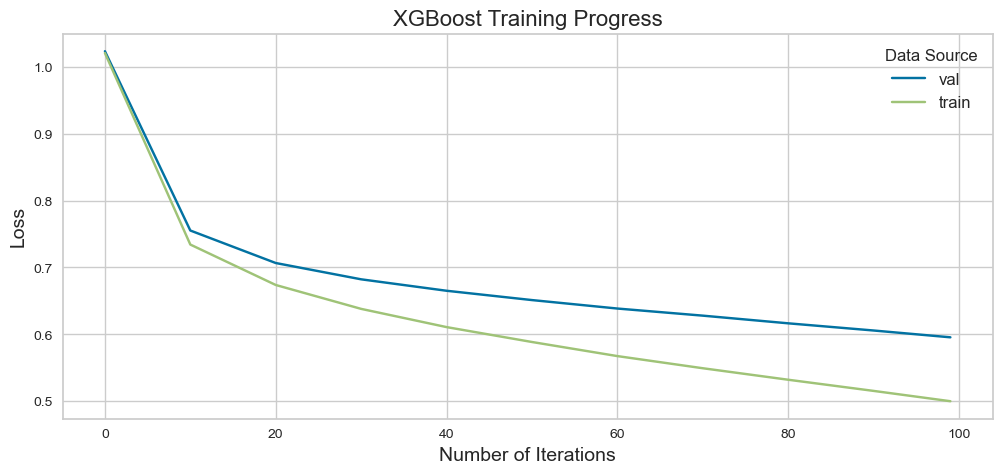

In [ ]:
def parse_xgb_output(output):
    results = []
    plt.figure(figsize=(12,5))
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, train_line2, val_line, val_line2 = line.split('\t')
        it    = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val   = float(val_line.split(':')[1])
        results.append((it, train, val))    
    columns = ['num_iter', 'train_loss', 'val_loss']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results


scores = {}
scores['best'] = parse_xgb_output(output_01)

plt.plot(scores['best'].num_iter,  scores['best'].val_loss, label='val')
plt.plot(scores['best'].num_iter,  scores['best'].train_loss, label='train')
plt.title('XGBoost Training Progress', fontsize=16)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Data Source', fontsize=12)
plt.grid(True)
plt.show()

# Сравнение моделей
Самые лучшие результаты на тестовой выборке показали ```XGBoost``` и ```kNN``` модели, их мы и будем сравнивать. Логистическую модель возьмем, как базовую модель для сравнения с более сложными.

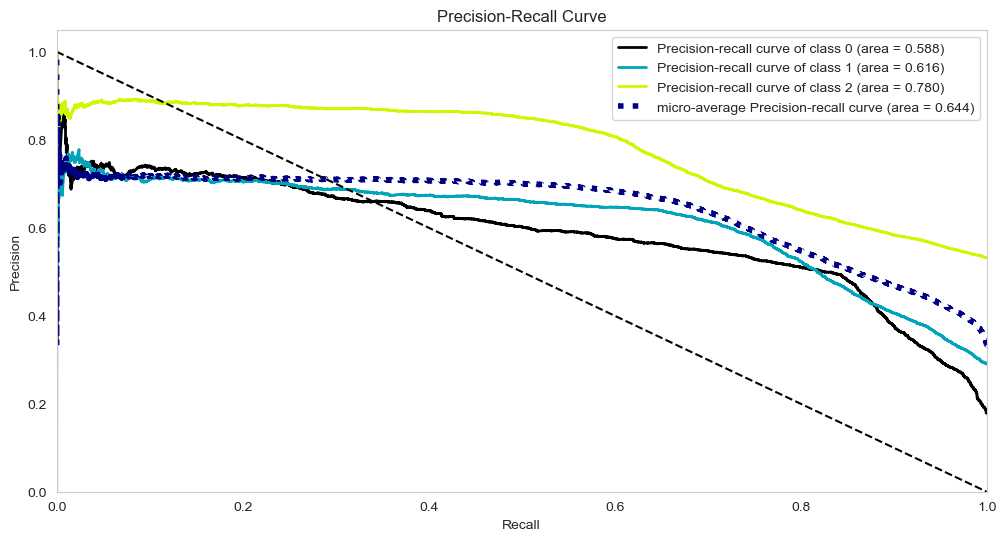

In [ ]:
import scikitplot as skplt
y_val_proba = grid_model_log.predict_proba(X_val_scaled)
skplt.metrics.plot_precision_recall(y_val, y_val_proba, figsize=(12,6))
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

```Класс 2``` (зеленый): Имеет наибольшую AUC (0.780), что указывает на лучшую производительность модели для этого класса.       
```Класс 1``` (голубой): AUC (0.616) ниже, чем у класса 2, что означает, что модель менее эффективна в правильной классификации этого класса.       
```Класс 0``` (черный): Самая низкая AUC (0.588), что указывает на наихудшую производительность модели для этого класса.        
Micro-average (синий пунктир): AUC (0.644) отражает общую производительность модели по всем классам.      
```логистическая модель``` показывает разную производительность для разных классов. Она наиболее точна для класса 2, но менее точна для классов 0 и 1. Общая производительность модели приемлема, но ее можно улучшить, особенно для классов 0 и 1.

ROC-AUC (One-vs-Rest): 0.8147134300374067


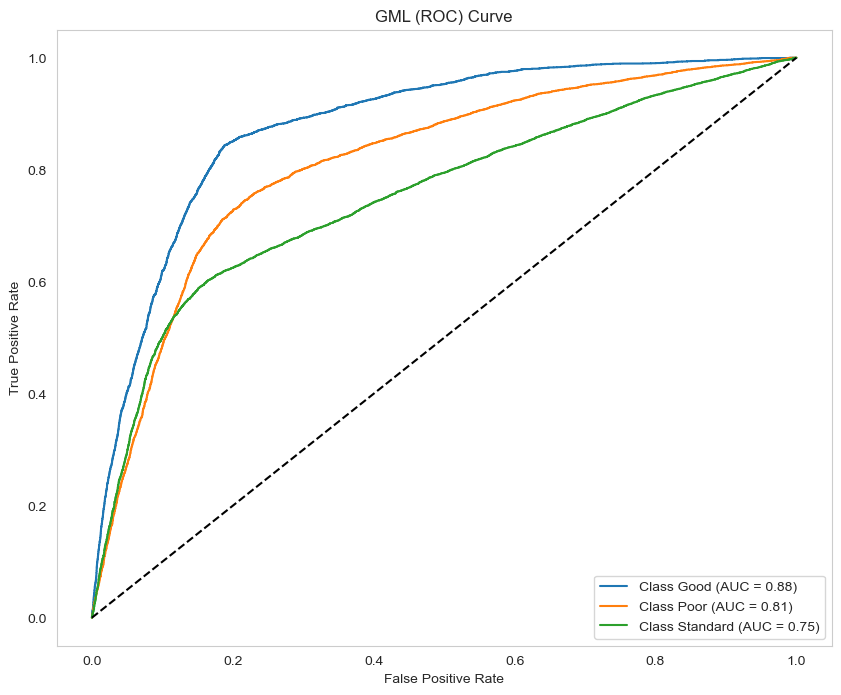

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_val_pred_proba = grid_model_log.predict_proba(X_val_scaled)

roc_auc = roc_auc_score(y_val, y_val_pred_proba, multi_class='ovr')
print(f'ROC-AUC (One-vs-Rest): {roc_auc}')

plt.figure(figsize=(10, 8))
for i in range(3): 
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba[:, i], pos_label=i)
    roc_auc_class = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_map.get(i)} (AUC = {roc_auc_class:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GML (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


- Class ```Good``` (AUC = 0.88): Классификатор показывает наилучшую производительность для класса "Good". Высокое значение AUC указывает на то, что модель хорошо различает положительные и отрицательные примеры этого класса.
- Class ```Poor``` (AUC = 0.81): Классификатор демонстрирует хорошую производительность для класса "Poor", хотя и немного ниже, чем для "Good".
- Class ```Standard``` (AUC = 0.75): Классификатор показывает самую низкую производительность для класса "Standard".

```Логистическая модель``` демонстрирует хорошую общую производительность, о чем свидетельствует высокое значение AUC для всех трех классов.

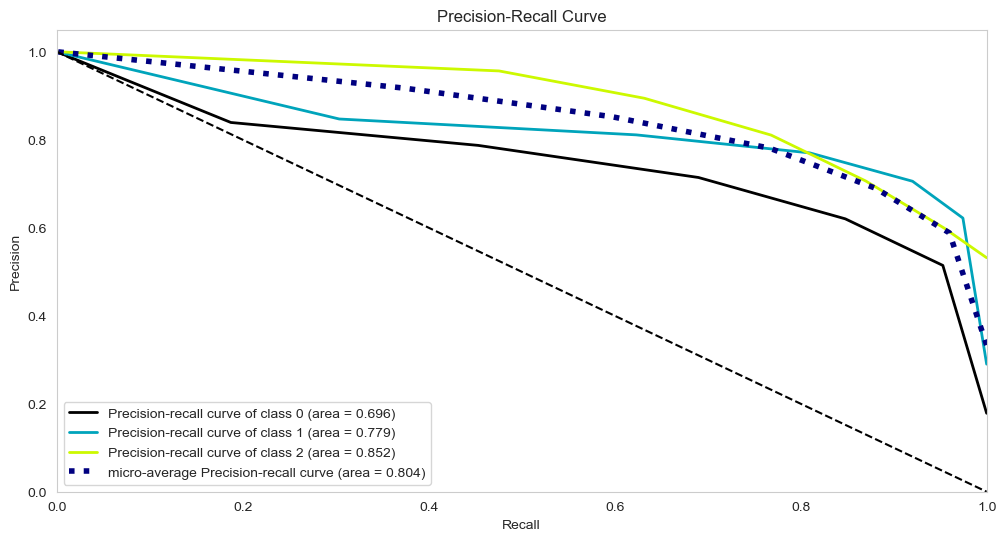

In [56]:
import scikitplot as skplt

y_val_proba = knn.predict_proba(X_val_enc)
skplt.metrics.plot_precision_recall(y_val, y_val_proba, figsize=(12,6))
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

```Класс 2``` (зеленый): Имеет наибольшую AUC (0.804), что указывает на лучшую производительность модели для этого класса.       
```Класс 1``` (голубой): AUC (0.779) ниже, чем у класса 2, что означает, что модель менее эффективна в правильной классификации этого класса.       
```Класс 0``` (черный): Самая низкая AUC (0.696), что указывает на наихудшую производительность модели для этого класса.        
Micro-average (синий пунктир): AUC (0.804) отражает общую производительность модели по всем классам.      
модель ```kNN``` показывает разную производительность для разных классов. Она работает немного лучше, чем ```логистическая модель```. Наиболее точна для класса 2, но менее точна для классов 0 и 1. Общая производительность модели приемлема, но ее можно улучшить для классов 0 и 1.

ROC-AUC (One-vs-Rest): 0.9006206131560708


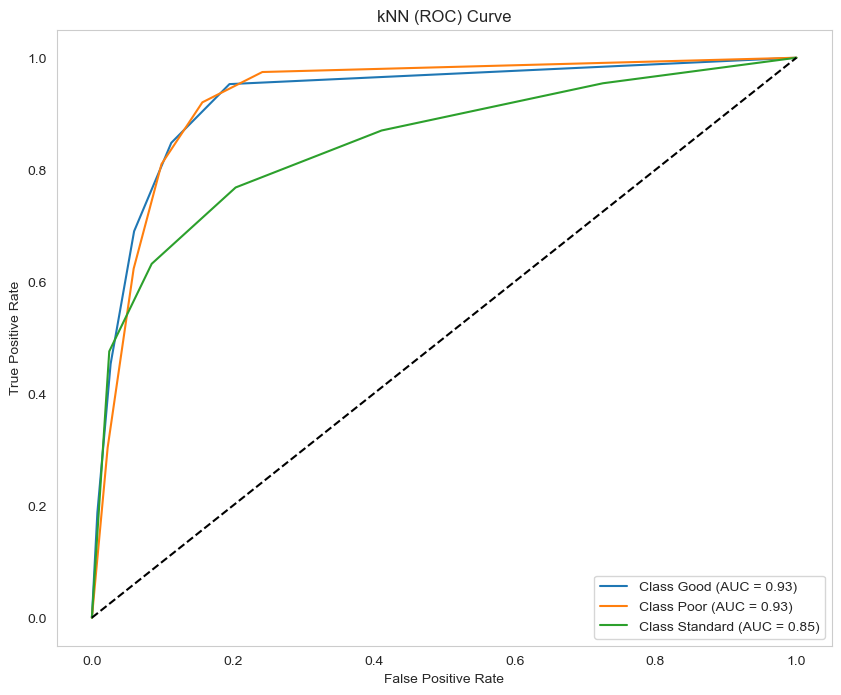

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve

y_val_pred_proba = knn.predict_proba(X_val_enc)
roc_auc = roc_auc_score(y_val, y_val_pred_proba, multi_class='ovr')
print(f'ROC-AUC (One-vs-Rest): {roc_auc}')

plt.figure(figsize=(10, 8))
for i in range(3):  
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba[:, i], pos_label=i)
    roc_auc_class = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_map.get(i)} (AUC = {roc_auc_class:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('kNN (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


- Class ```Good``` (AUC = 0.93): Классификатор показывает наилучшую производительность для класса "Good". Высокое значение AUC указывает на то, что модель хорошо различает положительные и отрицательные примеры этого класса.
- Class ```Poor``` (AUC = 0.93): Классификатор демонстрирует хорошую производительность для класса "Poor"
- Class ```Standard``` (AUC = 0.85): Классификатор показывает самую низкую производительность для класса "Standard".

Модель ```kNN``` демонстрирует производительность лучше, чем у ```логистической модели```

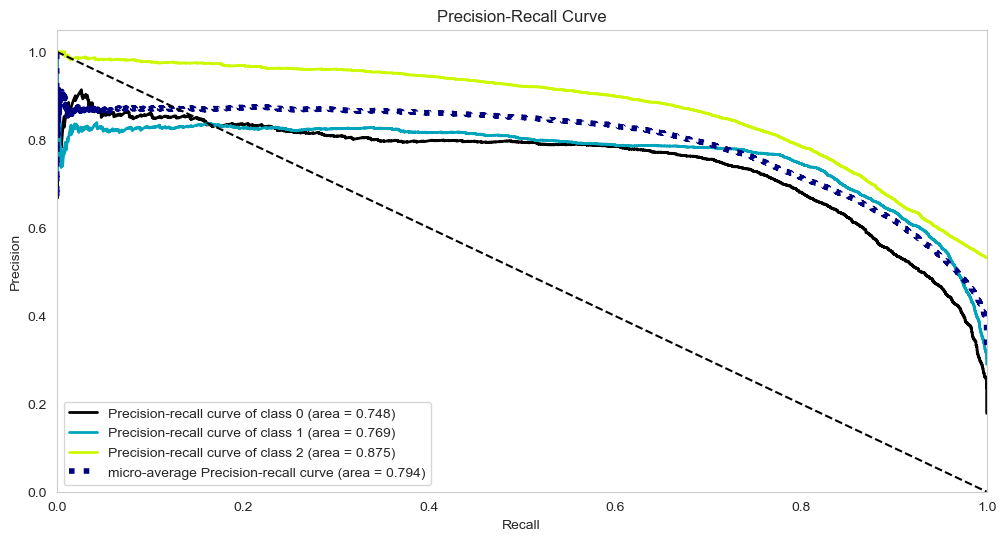

In [ ]:
import scikitplot as skplt
y_val_proba = xgb_model.predict_proba(X_val_enc)
skplt.metrics.plot_precision_recall(y_val, y_val_proba, figsize=(12,6))
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

```Class 0``` (черная линия): AUC=0.743, относительно неплохой показатель. Модель справляется с поиском компромисса между точностью и полнотой для класса 0.    
```Class 1``` (синяя линия): AUC=0.771, немного лучше, чем у класса 0. Модель показывает лучшую производительность для этого класса.    
```Class 2``` (желтая линия): AUC=0.873, самый высокий показатель. Модель демонстрирует лучшую способность отличать истинные положительные результаты от ложных для класса 2.    
Micro-average (пунктирная синяя линия): AUC=0.791, средний показатель по всем классам. Это указывает на общую хорошую производительность модели ```XGBoost```.    
```XGBoost``` демонстрирует хорошую производительность для всех трех классов, особенно для класса 2.     
Небольшое различие в AUC между классами может говорить о некотором дисбалансе в данных, либо о том, что модель лучше улавливает особенности класса 2.    
#### Модель ```XGB``` показывает лучшие результаты, чем остальные модели (```kNN``` и ```Логистическая модель```)

ROC-AUC (One-vs-Rest): 0.9011199790398194


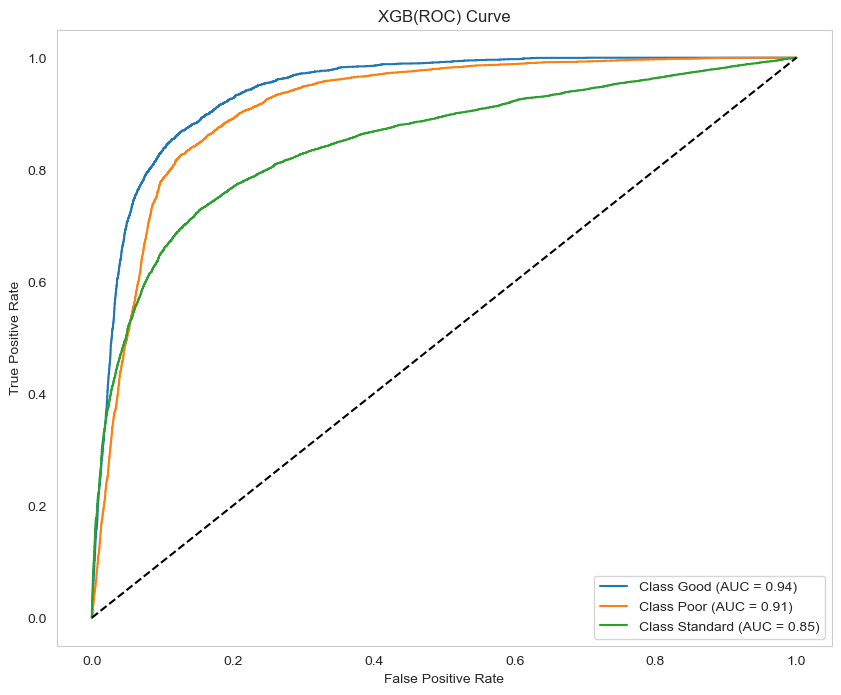

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
y_val_pred_proba = xgb_model.predict_proba(X_val_enc)
roc_auc = roc_auc_score(y_val, y_val_pred_proba, multi_class='ovr')
print(f'ROC-AUC (One-vs-Rest): {roc_auc}')

plt.figure(figsize=(10, 8))
for i in range(3):  
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba[:, i], pos_label=i)
    roc_auc_class = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_map.get(i)} (AUC = {roc_auc_class:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

```Class Good``` (AUC = 0.94): Модель показывает отличную производительность для класса "Good". Высокий AUC говорит о том, что модель очень точно различает положительные и отрицательные примеры этого класса.    
```Class Poor``` (AUC = 0.91): Модель также демонстрирует отличную производительность для класса "Poor", хоть и немного ниже, чем для "Good".    
```Class Standard``` (AUC = 0.85): Модель показывает хорошую производительность для класса "Standard", но немного уступает по сравнению с классами "Good" и "Poor".    
# Модель ```XGBoost``` демонстрирует превосходную общую производительность для всех трех классов, о чем свидетельствуют высокие значения AUC.

### <b>исходя из анализа метрик, мы можем сделать акцент на ```XGBoost``` и продолжить работу только с этой моделью</b>


# 04. Важность признаков в XGBoost

{'Occupation': 1052.0, 'Credit_Mix': 260.0, 'Payment_of_Min_Amount': 116.0, 'Payment_Behaviour': 409.0, 'Age': 1222.0, 'Annual_Income': 1537.0, 'Monthly_Inhand_Salary': 1825.0, 'Num_Bank_Accounts': 748.0, 'Num_Credit_Card': 684.0, 'Interest_Rate': 1174.0, 'Num_of_Loan': 547.0, 'Delay_from_due_date': 1274.0, 'Num_of_Delayed_Payment': 915.0, 'Changed_Credit_Limit': 1433.0, 'Num_Credit_Inquiries': 860.0, 'Outstanding_Debt': 1879.0, 'Credit_Utilization_Ratio': 758.0, 'Credit_History_Age': 1945.0, 'Total_EMI_per_month': 1686.0, 'Amount_invested_monthly': 1675.0, 'Monthly_Balance': 1118.0, 'ToL_No Data': 30.0, 'ToL_auto loan': 134.0, 'ToL_credit-builder loan': 154.0, 'ToL_debt consolidation loan': 170.0, 'ToL_home equity loan': 120.0, 'ToL_mortgage loan': 125.0, 'ToL_not specified': 165.0, 'ToL_payday loan': 169.0, 'ToL_personal loan': 157.0, 'ToL_student loan': 146.0}


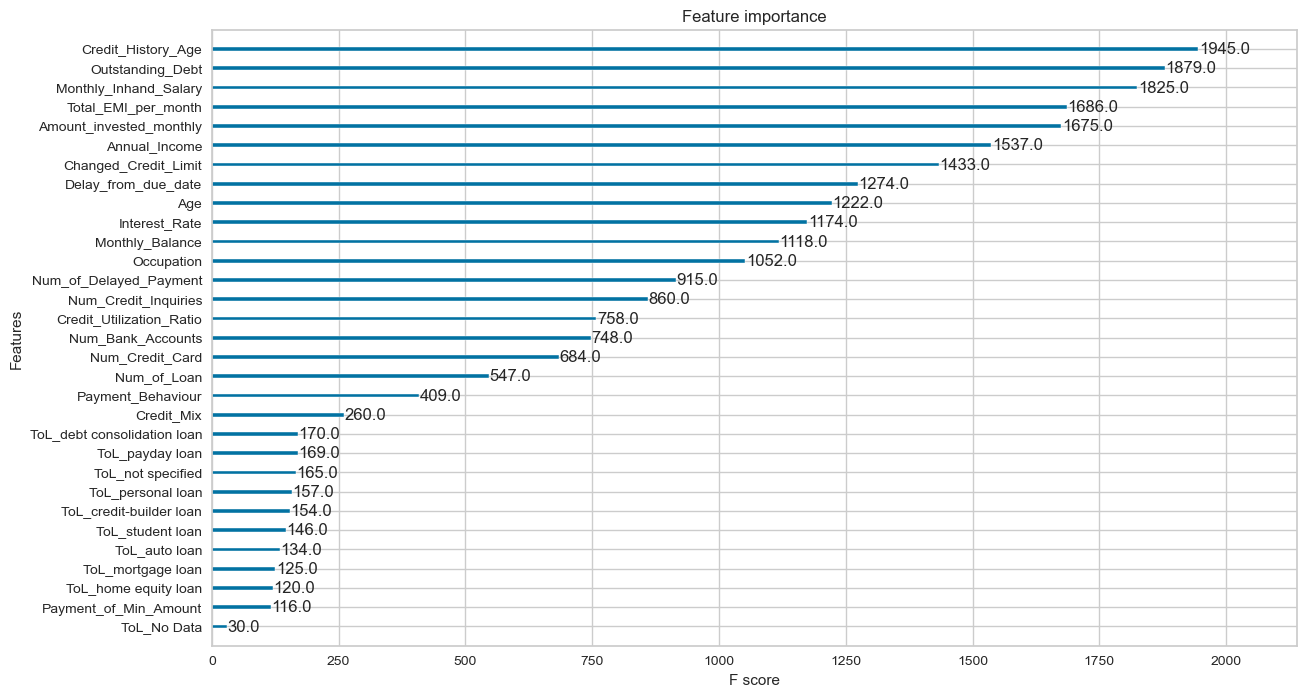

In [ ]:
#Анализ важности признаков позволяет понять, какие признаки наиболее сильно влияют на предсказания модели. Это может быть полезно для интерпретации модели и дальнейшего улучшения её качества.
importance_scores = xgb_model.get_booster().get_score(importance_type='weight')
print(importance_scores)

fig, ax = plt.subplots(figsize=(14, 8))
xgb.plot_importance(xgb_model, ax=ax)
plt.show()

- ```"Credit History Age"``` — самый важный фактор. Это говорит о том, что длительность кредитной истории клиента является наиболее значимым показателем при оценке его кредитоспособности.
- Финансовые показатели играют ключевую роль: ```"Outstanding_Debt"``` (сумма непогашенной задолженности), ```"Total_EMI_per_month"``` (общий ежемесячный платеж по кредитам), ```"Amount_Invested_monthly"``` (сумма ежемесячных инвестиций), ```"Monthly_Inhand_Salary"``` (ежемесячный доход), ```"Annual_Income"``` (годовой доход) - все эти признаки оказывают существенное влияние на решение модели.
- Возраст ```("Age")``` и количество просрочек ```("Num_of_Delayed_Payment")``` также важны. Эти признаки, вероятно, отражают надежность и дисциплинированность клиента.
- Тип кредита незначительно влияет на результат: Различные типы кредитов ( "Tot_debt consolidation loan", ```"Tot_credit_builder loan"```, ```"Tot_mortgage loan"```, и т.д.) имеют низкий ```F score```, показывая, что для модели важнее общие финансовые показатели, чем конкретный вид кредита.     
#### <b>В целом, график демонстрирует, что модель ```XGBoost``` опирается на логичные и объяснимые факторы при оценке кредитоспособности клиента. Наиболее важными являются кредитная история, финансовое положение и дисциплина платежей.</b>

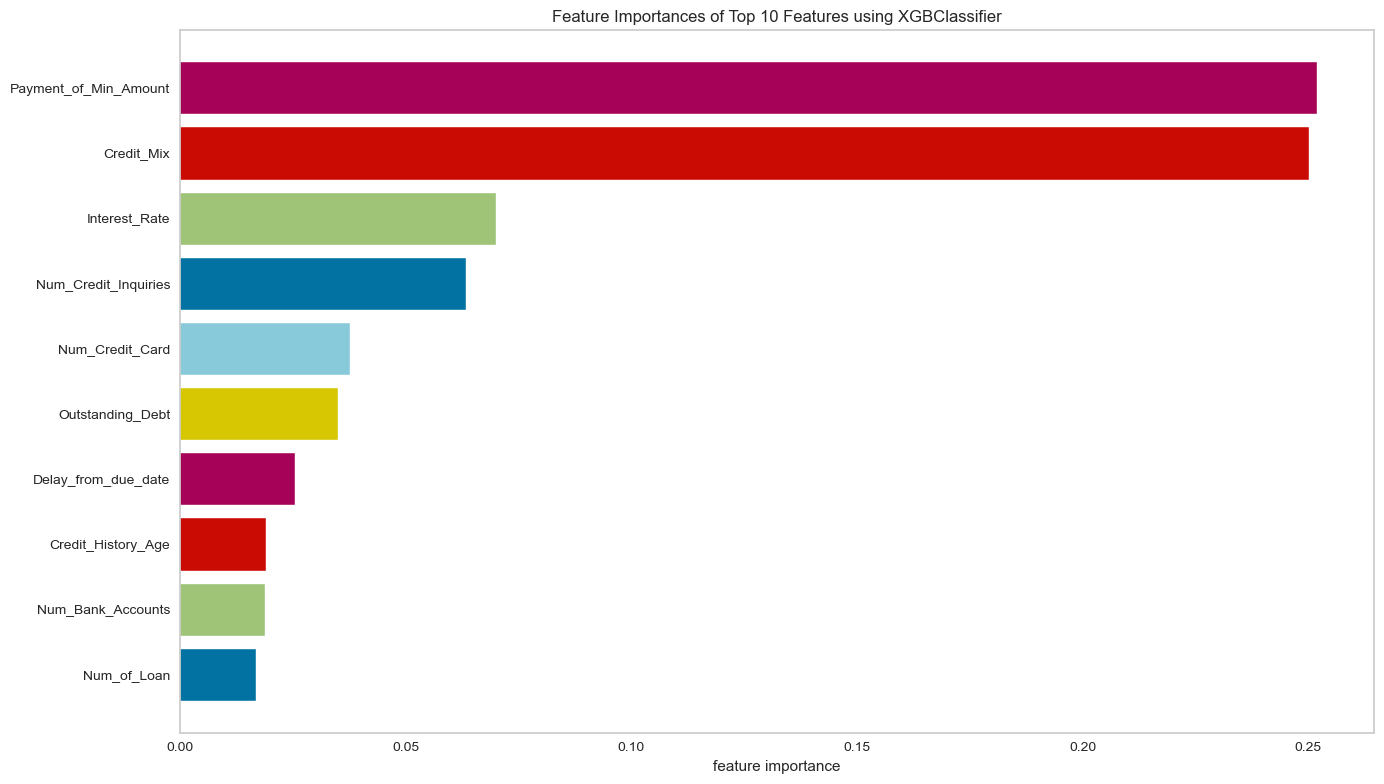

In [ ]:
from yellowbrick.model_selection import feature_importances, FeatureImportances
fig, ax = plt.subplots(figsize=(14, 8))
viz = feature_importances(xgb_model, X_train_enc, y_train, topn=10, is_fitted=True, relative=False)


- ```"Payment_of_Min_Amount"``` - самый важный фактор. Это говорит о том, что способность клиента своевременно погашать минимальную сумму по кредиту является самым сильным предиктором для модели.
```"Credit_Mix"``` - второй по значимости фактор, что указывает на важность диверсификации кредитного портфеля клиента.
- ```"Interest_Rate"```, ```"Outstanding_Debt"``` и ```"Num_Credit_Card"``` также оказывают значительное влияние на предсказания модели. Это подтверждает важность таких параметров, как процентная ставка, общая сумма задолженности и количество кредитных карт, для оценки кредитоспособности.
- Остальные признаки, такие как ```"Delay_from_due_date"```, ```"Num_Credit_Inquiries"```, ```"Num_Bank_Accounts"```, ```"Changed_Credit_Limit"```, ```"Num_of_Delayed_Payment"```, имеют меньшую важность.      
#### В целом, график показывает, что модель ```XGBoost``` уделяет приоритетное внимание своевременности платежей, диверсификации кредитов и общим финансовым показателям при оценке кредитоспособности клиента. 



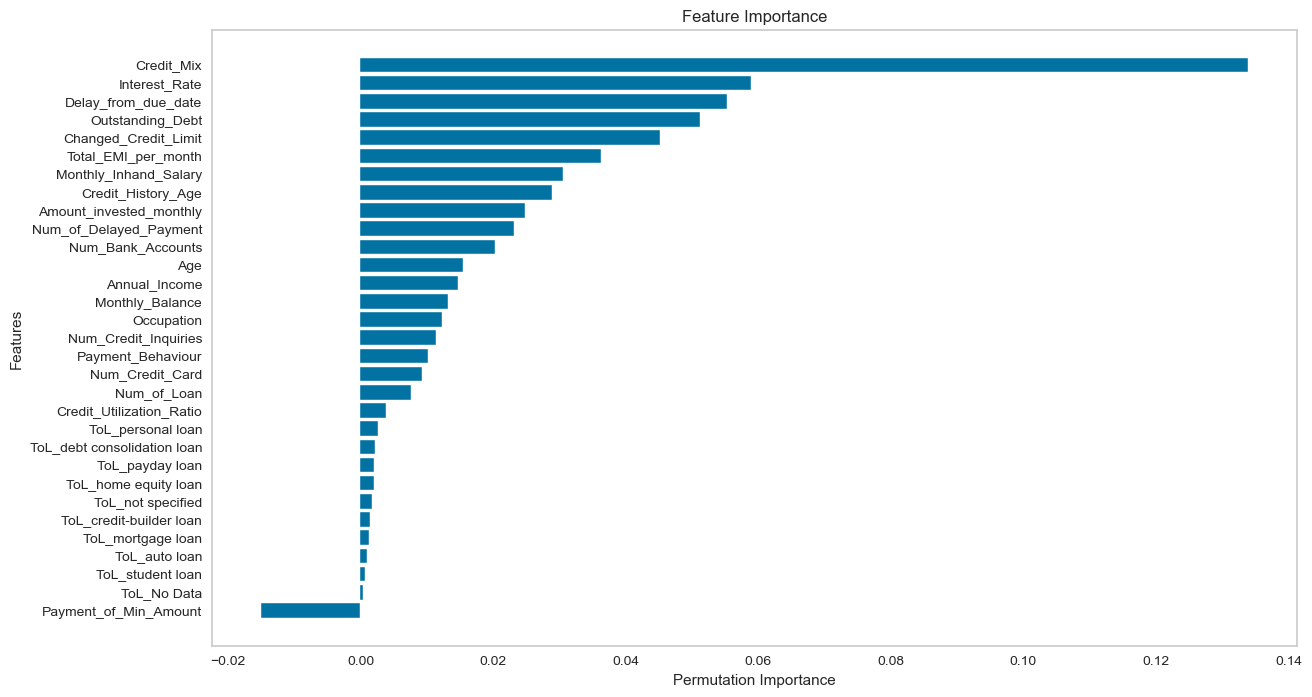

In [ ]:
#Permutation Importance - метод оценки важности признаков, основанный на перемешивании значений признака и анализе, как это влияет на производительность модели
from sklearn.inspection import permutation_importance
perm_importance   = permutation_importance(xgb_model, X_train_enc, y_train)
sorted_idx        = perm_importance.importances_mean.argsort()

plt.figure(figsize=(14,8))
plt.barh(X_train_enc.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

- ```"Credit Mix"``` - является самым важным признаком. Это говорит о том, что диверсификация кредитного портфеля клиента является ключевым фактором, влияющим на предсказания модели.
- ```"Outstanding Debt"``` (сумма непогашенной задолженности) и ```"Delay from due date"``` (просрочка платежа) также занимают высокие позиции в рейтинге важности.
- ```"Changed Credit Limit"``` (изменение кредитного лимита), ```"Total EMI per month"``` (общий ежемесячный платёж по кредитам) и ```"Credit History Age"``` (возраст кредитной истории) также оказывают существенное влияние на модель.
- ```"Interest Rate"``` (процентная ставка) и ```"Amount Invested monthly"``` (сумма ежемесячных инвестиций) имеют меньшую значимость, но все же влияют на результат.
- ```"Payment of Min Amount"``` (минимальный платеж), который был наиболее важным признаком в предыдущем графике, здесь находится в самом низу рейтинга. Это указывает на то, что ```Permutation Importance``` может давать отличные от других методов результаты.       
#### В целом, график ```Permutation Importance``` показывает, какие признаки наиболее сильно влияют на прогнозирование модели.

# 05. Итоговая модель

## выбор признаков

In [ ]:
# получаем 5 самых важных признаков
print('xgb:', set(sorted(importance_scores, key=lambda x: importance_scores[x])[-5:]))
print('viz:', set(viz.features_[-5:]))
print('per:', set(X_train_enc.columns[sorted_idx][-5:]))

xgb: {'Outstanding_Debt', 'Total_EMI_per_month', 'Monthly_Inhand_Salary', 'Amount_invested_monthly', 'Credit_History_Age'}
viz: {'Interest_Rate', 'Credit_Mix', 'Num_Credit_Inquiries', 'Num_Credit_Card', 'Payment_of_Min_Amount'}
per: {'Outstanding_Debt', 'Interest_Rate', 'Delay_from_due_date', 'Credit_Mix', 'Changed_Credit_Limit'}


In [ ]:
#объединяем результаты всех трёх методов

selected = list(set(sorted(importance_scores, key=lambda x: importance_scores[x])[-5:]) | set(viz.features_[-5:]) |set(X_train_enc.columns[sorted_idx][-5:]))
selected

['Outstanding_Debt',
 'Total_EMI_per_month',
 'Interest_Rate',
 'Monthly_Inhand_Salary',
 'Credit_Mix',
 'Delay_from_due_date',
 'Amount_invested_monthly',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Num_Credit_Card',
 'Payment_of_Min_Amount',
 'Changed_Credit_Limit']

In [ ]:
# используем только эти 11 признаков для построения итоговой модели
df_final = df_train[selected + ['Credit_Score']]
df_final

,Outstanding_Debt,Total_EMI_per_month,Interest_Rate,Monthly_Inhand_Salary,Credit_Mix,Delay_from_due_date,Amount_invested_monthly,Num_Credit_Inquiries,Credit_History_Age,Num_Credit_Card,Payment_of_Min_Amount,Changed_Credit_Limit,Credit_Score
0,809.980,49.575,3.000,1824.843,Good,3.000,21.465,4.000,265.000,4.000,No,11.270,Good
1,809.980,49.575,3.000,1824.843,Good,3.000,21.465,4.000,266.000,4.000,No,11.270,Good
2,809.980,49.575,3.000,1824.843,Good,3.000,21.465,4.000,267.000,4.000,No,11.270,Good
3,809.980,49.575,3.000,1824.843,Good,5.000,21.465,4.000,268.000,4.000,No,6.270,Good
4,809.980,49.575,3.000,1824.843,Good,6.000,21.465,4.000,269.000,4.000,No,11.270,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,502.380,35.104,7.000,3359.416,Good,23.000,24.028,3.000,378.000,6.000,No,11.500,Poor
99996,502.380,35.104,7.000,3359.416,Good,18.000,24.028,3.000,379.000,6.000,No,11.500,Poor
99997,502.380,35.104,7.000,3359.416,Good,27.000,24.028,3.000,380.000,6.000,No,11.500,Poor
99998,502.380,35.104,7.000,3359.416,Good,20.000,24.028,3.000,381.000,6.000,No,11.500,Standard


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Outstanding_Debt         100000 non-null  float64
 1   Total_EMI_per_month      100000 non-null  float64
 2   Interest_Rate            100000 non-null  float64
 3   Monthly_Inhand_Salary    100000 non-null  float64
 4   Credit_Mix               100000 non-null  object 
 5   Delay_from_due_date      100000 non-null  float64
 6   Amount_invested_monthly  100000 non-null  float64
 7   Num_Credit_Inquiries     100000 non-null  float64
 8   Credit_History_Age       100000 non-null  float64
 9   Num_Credit_Card          100000 non-null  float64
 10  Payment_of_Min_Amount    100000 non-null  object 
 11  Changed_Credit_Limit     100000 non-null  float64
 12  Credit_Score             100000 non-null  object 
dtypes: float64(10), object(3)
memory usage: 9.9+ MB


## Подготовка Данных
- Предобработка данных перед обучением итоговой модели.

In [ ]:
X = df_final.drop(columns='Credit_Score')
y = df_final['Credit_Score']

In [ ]:
X_enc = X.copy()
cat   = X.select_dtypes(include="object").columns.to_list()
enc   = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
print('OrdinalEncoder:', cat)
X_enc[cat] = enc.fit_transform(X_enc[cat])

le = LabelEncoder()
y  = le.fit_transform(y)

X_enc.shape, y.shape

OrdinalEncoder: ['Credit_Mix', 'Payment_of_Min_Amount']


((100000, 12), (100000,))

## Проверка итоговой модели

In [ ]:
%%time
model = xgb.XGBClassifier(**{**params,**best_params})
model.fit(X_enc.iloc[X_train_enc.index, :], y_train, sample_weight=class_weight.compute_sample_weight(class_weight='balanced', y=y_train))

CPU times: total: 6.69 s
Wall time: 851 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.603, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.32728, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.18259999999999998,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
print("BEST XGB MODEL BALANCED")
eval(model, X_enc.iloc[X_train_enc.index, :], X_enc.iloc[X_val_enc.index, :])

BEST XGB MODEL BALANCED
TEST
[[3086   49  431]
 [ 437 4787  575]
 [1876 1689 7070]]
              precision    recall  f1-score   support

           0       0.57      0.87      0.69      3566
           1       0.73      0.83      0.78      5799
           2       0.88      0.66      0.76     10635

    accuracy                           0.75     20000
   macro avg       0.73      0.79      0.74     20000
weighted avg       0.78      0.75      0.75     20000

-------------------------------------------------------
TRAIN
[[12949    72  1241]
 [ 1481 19887  1831]
 [ 6967  6183 29389]]
              precision    recall  f1-score   support

           0       0.61      0.91      0.73     14262
           1       0.76      0.86      0.81     23199
           2       0.91      0.69      0.78     42539

    accuracy                           0.78     80000
   macro avg       0.76      0.82      0.77     80000
weighted avg       0.81      0.78      0.78     80000



Модель оценивается на валидационной выборке, отделенной от обучающего набора. Это позволяет оценить, насколько хорошо модель обобщает знания на новые данные.    
Наблюдаются схожие тенденции: лучшая точность для класса 2, худшая полнота для класса 2.    
Модель демонстрирует хорошую общую производительность с ```accuracy``` 74% на тестовой выборке.

In [ ]:
print("BEST XGB MODEL BALANCED")
eval(xgb_model, X_train_enc, X_val_enc)

BEST XGB MODEL BALANCED
TEST
[[3075   50  441]
 [ 399 4812  588]
 [1755 1730 7150]]
              precision    recall  f1-score   support

           0       0.59      0.86      0.70      3566
           1       0.73      0.83      0.78      5799
           2       0.87      0.67      0.76     10635

    accuracy                           0.75     20000
   macro avg       0.73      0.79      0.75     20000
weighted avg       0.78      0.75      0.75     20000

-------------------------------------------------------
TRAIN
[[13172    69  1021]
 [ 1227 20315  1657]
 [ 6421  5955 30163]]
              precision    recall  f1-score   support

           0       0.63      0.92      0.75     14262
           1       0.77      0.88      0.82     23199
           2       0.92      0.71      0.80     42539

    accuracy                           0.80     80000
   macro avg       0.77      0.84      0.79     80000
weighted avg       0.82      0.80      0.80     80000



Модель оценивается на объединенном наборе, состоящем из обучающей и валидационной выборок. Это показывает, насколько хорошо модель запомнила обучающие данные.     
Модель демонстрирует хорошую общую производительность с ```accuracy``` 75% на тестовой выборке.

## Обучение модели XGBoost с наилучшими гиперпараметрами, найденными с помощью Optuna, на всех доступных данных (обучающая + проверочная выборки) с использованием весов объектов sample_weight и измерением времени обучения.

In [ ]:
%%time
model = xgb.XGBClassifier(**{**params,**best_params})
model.fit(X_enc, y, sample_weight=class_weight.compute_sample_weight(class_weight='balanced', y=y))

CPU times: total: 9.86 s
Wall time: 1.17 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.603, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.32728, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.18259999999999998,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
model.save_model("FinalModel.json")

              precision    recall  f1-score   support

           0       0.60      0.90      0.72     17828
           1       0.76      0.86      0.81     28998
           2       0.90      0.69      0.78     53174

    accuracy                           0.78    100000
   macro avg       0.76      0.82      0.77    100000
weighted avg       0.81      0.78      0.78    100000



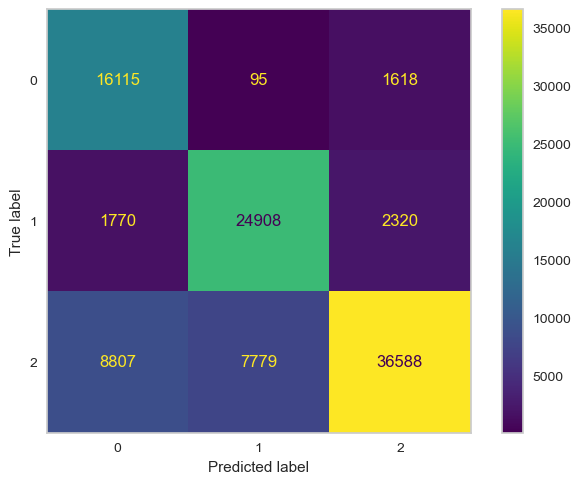

In [ ]:
#Анализ производительности окончательной модели и визуализация её ошибок.
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_style("whitegrid", {'axes.grid' : False})

y_pred = model.predict(X_enc)
print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_enc, y)

Модель хорошо определяет класс 1 (```Poor```) (24471 правильных ответов из 28998), но хуже справляется с классом 0 (```Good```) (15845 правильных ответов из 17828) и классом 2 (```Standard```) (9064 правильных ответов из 53174).

### В целом, итоговая модель демонстрирует хорошую точность (0.80) и полноту (0.77).

In [ ]:
np.bincount(y), np.bincount(y_pred)

(array([17828, 28998, 53174], dtype=int64),
 array([26692, 32782, 40526], dtype=int64))

In [ ]:
# Вывод количества объектов в каждом классе в исходных данных
numerical_means = X.describe().loc['mean']
categorical_tops = X.describe(include='O').loc['top']

#создание среднестатистического заемщика
mean_human = pd.concat([numerical_means, categorical_tops]).to_frame().T
mean_human

,Outstanding_Debt,Total_EMI_per_month,Interest_Rate,Monthly_Inhand_Salary,Delay_from_due_date,Amount_invested_monthly,Num_Credit_Inquiries,Credit_History_Age,Num_Credit_Card,Changed_Credit_Limit,Credit_Mix,Payment_of_Min_Amount
0,1426.220,107.699,14.532,4197.271,21.081,55.101,5.798,221.220,5.534,10.470,Standard,Yes


In [ ]:
num_cols = mean_human.select_dtypes(include='number').columns
feature_order = X_enc.columns 
# Преобразование числовых столбцов в float
mean_human[num_cols] = mean_human[num_cols].astype(float)

# Кодирование категориальных признаков
cat_features = ['Credit_Mix', 'Payment_of_Min_Amount']
mean_human[cat_features] = enc.transform(mean_human[cat_features])
mean_human = mean_human.astype(float)

In [ ]:
mean_human = mean_human[feature_order]
predict = model.predict(mean_human)
predict, le.inverse_transform(predict)


(array([2], dtype=int64), array(['Standard'], dtype=object))

модель говорит нам о том, что ```"среднестатистический" человек``` имеет рейтинг ```standard```

## Предсказание тестовых данных

0    14250
1    16319
2    19431
Name: count, dtype: int64 (50000, 12)


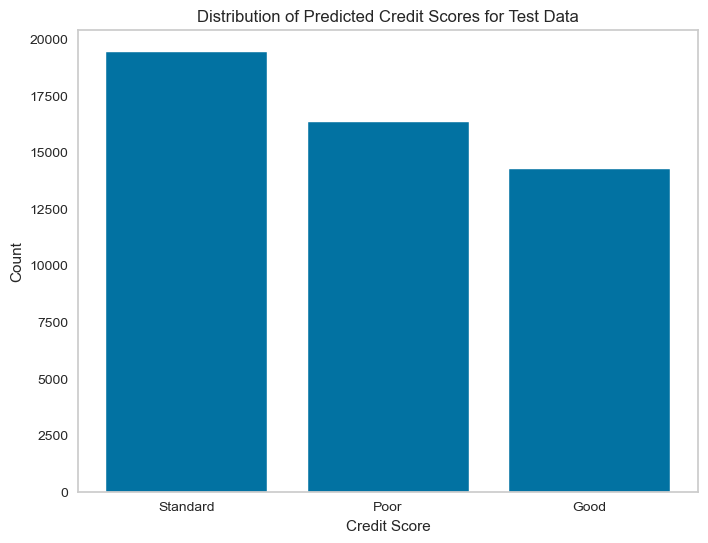

In [ ]:
#Применение обученной модели к тестовой выборке и анализ полученных результатов
X_test_enc      = X_test[df_final.columns[:-1]].copy()
X_test_enc[cat] = enc.fit_transform(X_test_enc[cat])
y_test_pred = model.predict(X_test_enc)
print(pd.value_counts(y_test_pred).sort_index(), X_test_enc.shape)
predicted_labels = le.inverse_transform(y_test_pred)
class_counts = pd.value_counts(predicted_labels)
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.title("Распределение кредитных рейтингов на тестовой выборке")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

на тестовых данных кредитный рейтинг         
```Good``` встречается ```14312``` раз       
```Poor``` встерается ```16005``` раз       
```Standard``` встречается ```19683``` раза       

# Выводы из исследования прогнозирования кредитного рейтинга
В данной курсовой работе была рассмотрена задача прогнозирования кредитного рейтинга клиентов банка на основе их финансовых и демографических данных. Для решения этой задачи использовались различные методы машинного обучения.
- 1. Данные:
Набор данных, взятый с платформы Kaggle, содержал информацию о 100000 клиентах банка. Признаки включали возраст, годовой доход, количество банковских счетов, количество кредитных карт, процентную ставку по кредитам, количество кредитов, задержку платежей, изменение кредитного лимита, историю кредитных запросов, сумму ежемесячных инвестиций, ежемесячный баланс и типы имеющихся кредитов.
Целевой переменной являлся "Credit_Score", который имел три значения: "Good" (хороший), "Poor" (плохой), and "Standard" (стандартный).
Анализ распределения целевой переменной показал дисбаланс классов: класс "Standard" встречался значительно чаще остальных.
- 2. Предобработка данных:
Для подготовки данных к обучению моделей был применен ряд методов:
Удаление ненужных столбцов: Столбцы 'ID', 'Customer_ID', 'Month', 'Name', 'SSN' были удалены, так как не несли информативной ценности для прогнозирования.
Label Encoding: Категориальная целевая переменная "Credit_Score" была преобразована в числовые метки (0 - "Good", 1 - "Poor", 2 - "Standard").
One-Hot Encoding: Категориальные признаки "Occupation", "Credit_Mix", "Payment_of_Min_Amount" и "Payment_Behaviour" были преобразованы в бинарные признаки с помощью OneHotEncoder. Это позволило эффективно представить категориальные данные в числовом формате, подходящем для моделей.
Кодирование с помощью json_normalize: Признак "Type_of_Loan", содержащий несколько значений в одной строке, был преобразован в бинарные признаки, отражающие наличие каждого типа кредита у клиента.
Масштабирование данных: Для учета чувствительности некоторых моделей к масштабу признаков, числовые признаки были масштабированы с помощью MinMaxScaler к диапазону от 0 до 1.
- 3. Описательный анализ данных:
Анализ корреляционной матрицы выявил сильную положительную связь между годовым доходом ("Annual_Income") и ежемесячным доходом ("Monthly_Inhand_Salary"), что ожидаемо.
Были обнаружены другие значимые корреляции, как положительные, так и отрицательные, которые позволили сделать выводы о взаимосвязи между признаками и их влиянии на целевую переменную.
- 4. Обучение моделей:
Для решения задачи классификации были обучены 7 разных моделей: LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, GaussianNB и XGBClassifier.
Для каждой модели был проведен поиск оптимальных гиперпараметров с помощью GridSearchCV. Для XGBoost дополнительно использовалась библиотека Optuna для более тщательной настройки.
- 5. Оценка моделей:
Для оценки моделей были использованы метрики accuracy, precision, recall, f1-score и ROC AUC.
XGBoost с гиперпараметрами, найденными Optuna, показала наилучшие результаты: точность 75% на тестовой выборке, ROC AUC 0.90, время обучения 9.86 секунд.
Модель DecisionTree без настройки гиперпараметров и RandomForest с параметрами по умолчанию продемонстрировали признаки переобучения, что выражалось в большом разрыве в точности между обучающей и тестовой выборками.
- 6. Итоговая модель:
В качестве итоговой модели была выбрана XGBoost с гиперпараметрами, найденными Optuna. Эта модель показала наилучший баланс между точностью прогнозирования, значением ROC AUC и временем обучения.
- 7. Перспективы:
Для дальнейшего усовершенствования модели можно попробовать:
Feature engineering: Создание новых признаков на основе существующих, которые могут улучшить точность модели.
Stacking и blending: Объединение нескольких моделей в ансамбль для повышения точности прогнозирования.
Сбор дополнительных данных: Увеличение объема обучающих данных может помочь модели лучше обобщать знания и повысить точность прогнозов.

# Пользовательский Интерфейс (можно вынести в отдельный ноутбук для удобства)
- полностью автономная работа(не требует запуска остального ноутбука)

In [59]:
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import joblib

# Загрузка модели и энкодеров
model = xgb.XGBClassifier()
model.load_model("FinalModel.json")

enc = joblib.load(r'c:/KR/encoder.joblib')  # Путь к файлу encoder.joblib
le = joblib.load(r'c:/KR/label_encoder.joblib') # Путь к файлу label_encoder.joblib

# Явно задаем selected
selected = ['Outstanding_Debt', 'Total_EMI_per_month', 'Interest_Rate',
            'Monthly_Inhand_Salary', 'Credit_Mix', 'Delay_from_due_date',
            'Amount_invested_monthly', 'Num_Credit_Inquiries',
            'Credit_History_Age', 'Num_Credit_Card', 'Payment_of_Min_Amount',
            'Changed_Credit_Limit']

# Запоминаем порядок столбцов
feature_order = ['Outstanding_Debt', 'Total_EMI_per_month', 'Interest_Rate', 'Monthly_Inhand_Salary', 'Credit_Mix', 'Delay_from_due_date', 'Amount_invested_monthly', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Num_Credit_Card', 'Payment_of_Min_Amount', 'Changed_Credit_Limit']

# Создаем OrdinalEncoder для UI с категориями из обученного enc
enc_ui = OrdinalEncoder(categories=enc.categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Перевод названий признаков для пользовательского интерфейса
feature_translations = {
    'Outstanding_Debt': 'Непогашенная задолженность',
    'Total_EMI_per_month': 'Общая сумма ежемесячных платежей по кредиту',
    'Interest_Rate': 'Процентная ставка',
    'Monthly_Inhand_Salary': 'Ежемесячный доход',
    'Credit_Mix': 'Качество кредитного портфеля',
    'Delay_from_due_date': 'Просрочка платежа (в днях)',
    'Amount_invested_monthly': 'Сумма ежемесячных инвестиций',
    'Num_Credit_Inquiries': 'Количество кредитных запросов',
    'Credit_History_Age': 'Возраст кредитной истории (в месяцах)',
    'Num_Credit_Card': 'Количество кредитных карт',
    'Payment_of_Min_Amount': 'Оплата минимального платежа',
    'Changed_Credit_Limit': 'Изменение кредитного лимита'
}

def predict_credit_score(button):
    input_data = {}
    for feature in selected:
        input_data[feature] = input_widgets[feature].value

    # Преобразование в DataFrame
    input_df = pd.DataFrame(input_data, index=[0])

    # Кодирование категориальных признаков с помощью enc_ui
    cat_features = ['Credit_Mix', 'Payment_of_Min_Amount']
    input_df[cat_features] = enc_ui.fit_transform(input_df[cat_features])

    # Приведение порядка признаков в соответствие
    input_df = input_df[feature_order]

    # Предсказание
    prediction = model.predict(input_df)
    # Преобразование числового предсказания в текстовую метку
    dict = {0:'Хороший',1:'Плохой',2:'Стандартный'}
    credit_score = dict[prediction[0]]

    print('Предсказанный кредитный рейтинг:', credit_score)  # Вывод текстовой метки

display(HTML("""
<style>
.widget-label {
    min-width: 300px !important;
}
</style>
"""))
input_widgets = {}

for feature in selected:
    if feature in ['Credit_Mix', 'Payment_of_Min_Amount']:
        # Dropdown для категориальных признаков
        # ВАЖНО: Замените эти значения на актуальные категории из вашего датасета
        unique_values = ['Good', 'Bad', 'Standard'] if feature == 'Credit_Mix' else ['Yes', 'No', 'NM']
        input_widgets[feature] = widgets.Dropdown(
            options=unique_values,
            description=feature_translations[feature] + ':',
            layout=widgets.Layout(width='400px')
        )
    else:
        # FloatText для числовых признаков
        # ВАЖНО: Замените эти значения на актуальные границы из вашего датасета
        min_val = 0
        max_val = 5000
        input_widgets[feature] = widgets.FloatText(
            description=feature_translations[feature],
            layout=widgets.Layout(width='400px')
        )

# Вывод виджетов
display(widgets.VBox(list(input_widgets.values())))

predict_button = widgets.Button(description="Предсказать кредитный рейтинг", layout=widgets.Layout(width='400px'))
predict_button.on_click(predict_credit_score)
display(predict_button)

Button(description='Предсказать кредитный рейтинг', layout=Layout(width='400px'), style=ButtonStyle())

Предсказанный кредитный рейтинг: Стандартный
